In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# Comment this if the data visualisations do not work
%matplotlib inline

plt.style.use('bmh')

In [2]:
data_ess8 = pd.read_csv('ESS8 data/ESS8e02_2.csv')
data_ess8.head()

/var/folders/hz/w8lmx83s7ks9bykdf41f9n_r0000gn/T/ipykernel_69586/3132522814.py:1: DtypeWarning: Columns (168) have mixed types. Specify dtype option on import or set low_memory=False.
  data_ess8 = pd.read_csv('ESS8 data/ESS8e02_2.csv')


,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,inwmms,inwyys,inwshh,inwsmm,inwdde,inwmme,inwyye,inwehh,inwemm,inwtm
0,ESS8e02_2,8,2.2,10.12.2020,1,AT,0.611677,1.178495,0.370393,0.436506,...,12,2016,7,37,5,12,2016,8,33,50.0
1,ESS8e02_2,8,2.2,10.12.2020,2,AT,1.223354,0.899471,0.370393,0.333158,...,11,2016,9,39,25,11,2016,11,10,86.0
2,ESS8e02_2,8,2.2,10.12.2020,4,AT,0.389058,0.315753,0.370393,0.116953,...,11,2016,17,17,22,11,2016,18,0,38.0
3,ESS8e02_2,8,2.2,10.12.2020,6,AT,0.642594,0.472467,0.370393,0.174999,...,10,2016,19,9,11,10,2016,19,59,46.0
4,ESS8e02_2,8,2.2,10.12.2020,10,AT,3.432402,2.246706,0.370393,0.832164,...,12,2016,10,31,1,12,2016,11,49,70.0


In [4]:
data_ess8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44387 entries, 0 to 44386
Columns: 535 entries, name to inwtm
dtypes: float64(227), int64(298), object(10)
memory usage: 181.2+ MB


### Cleaning the data based on codebook

<details>
    <summary>Missing value codes</summary>

nwspol: missing if 7777 (refusal), 8888 (don't know) or 9999 (no answer)

netusoft: missing if 7 (refusal), 8 (don't know) or 9 (no answer)

netustm: missing if 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

ppltrst: missing if 77 (refusal), 88 (don't know) or 99 (no answer)

pplfair: missing if 77 (refusal), 88 (don't know) or 99 (no answer)

pplhlp: missing if 77 (refusal), 88 (don't know) or 99 (no answer)

polintr: missing if 7 (refusal), 8 (don't know) or 9 (no answer)

psppsgva: missing if 7 (refusal), 8 (don't know) or 9 (no answer)

actrolga: missing if 7 (refusal), 8 (don't know) or 9 (no answer)

psppipla: missing if 7 (refusal), 8 (don't know) or 9 (no answer)

cptppola: missing if 7 (refusal), 8 (don't know) or 9 (no answer)

trstlgl: missing if 77 (refusal), 88 (don't know) or 99 (no answer)

trstplc: missing if 77 (refusal), 88 (don't know) or 99 (no answer)

trstplt: missing if 77 (refusal), 88 (don't know) or 99 (no answer)

trstep: missing if 77 (refusal), 88 (don't know) or 99 (no answer)

trstun: missing if 77 (refusal), 88 (don't know) or 99 (no answer)

trstprt: missing if 77 (refusal), 88 (don't know) or 99 (no answer)

trstprl: missing if 77 (refusal), 88 (don't know) or 99 (no answer)

vote: missing if 7 (refusal), 8 (don't know) or 9 (no answer)

prtvtbat: missing if 77 (refusal), 88 (don't know) or 99 (no answer)

prtvtcbe: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtvtfch: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtvtdcz: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtvede1: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtvede2: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtvtfee: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtvtdes: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtvtdfi: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtvtcfr: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtvtbgb: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtvtehu: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtvtbie: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtvtcil: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtvtbis: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtvtbit: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtvblt1: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtvblt2: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtvblt3: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtvtfnl: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtvtbno: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtvtdpl: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtvtcpt: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtvtdru: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtvtbse: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtvtesi: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

contplt: missing if 7 (refusal), 8 (don't know) or 9 (no answer)

wrkprty: missing if 7 (refusal), 8 (don't know) or 9 (no answer)

wrkorg: missing if 7 (refusal), 8 (don't know) or 9 (no answer)

badge: missing if 7 (refusal), 8 (don't know) or 9 (no answer)

sgnptit: missing if 7 (refusal), 8 (don't know) or 9 (no answer)

pbldmn: missing if 7 (refusal), 8 (don't know) or 9 (no answer)

bctprd: missing if 7 (refusal), 8 (don't know) or 9 (no answer)

pstplonl: missing if 7 (refusal), 8 (don't know) or 9 (no answer)

clsprty: missing if 7 (refusal), 8 (don't know) or 9 (no answer)

prtclcat: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtclcbe: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtclfch: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtcldcz: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtclede: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtclfee: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtclees: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtcldfi: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtclefr: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtclbgb: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtclfhu: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtcldie: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtcldil: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtclbis: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtclcit: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtclblt: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtclenl: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtclbno: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtclgpl: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtclept: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtcldru: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtclbse: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtclesi: missing if 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

prtdgcl: missing if 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

lrscale: 77 (refusal), 88 (don't know) or 99 (no answer)

stflife: 77 (refusal), 88 (don't know) or 99 (no answer)

stfeco: 77 (refusal), 88 (don't know) or 99 (no answer)

stfgov: 77 (refusal), 88 (don't know) or 99 (no answer)

stfdem: 77 (refusal), 88 (don't know) or 99 (no answer)

stfedu: 77 (refusal), 88 (don't know) or 99 (no answer)

stfhlth: 77 (refusal), 88 (don't know) or 99 (no answer)

gincdif: 7 (refusal), 8 (don't know) or 9 (no answer)

mnrgtjb: 7 (refusal), 8 (don't know) or 9 (no answer)

freehms: 7 (refusal), 8 (don't know) or 9 (no answer)

hmsfmlsh: 7 (refusal), 8 (don't know) or 9 (no answer)

hmsacld: 7 (refusal), 8 (don't know) or 9 (no answer)

euftf: 77 (refusal), 88 (don't know) or 99 (no answer)

imsmetn: 7 (refusal), 8 (don't know) or 9 (no answer)

imdfetn: 7 (refusal), 8 (don't know) or 9 (no answer)

impcntr: 7 (refusal), 8 (don't know) or 9 (no answer)

imbgeco: 77 (refusal), 88 (don't know) or 99 (no answer)

imueclt: 77 (refusal), 88 (don't know) or 99 (no answer)

imwbcnt: 77 (refusal), 88 (don't know) or 99 (no answer)

happy: 77 (refusal), 88 (don't know) or 99 (no answer)

sclmeet: 77 (refusal), 88 (don't know) or 99 (no answer)

inprdsc: 77 (refusal), 88 (don't know) or 99 (no answer)

sclact: 7 (refusal), 8 (don't know) or 9 (no answer)

crmvct: 7 (refusal), 8 (don't know) or 9 (no answer)

aesfdrk: 7 (refusal), 8 (don't know) or 9 (no answer)

health: 7 (refusal), 8 (don't know) or 9 (no answer)

hlthhmp: 7 (refusal), 8 (don't know) or 9 (no answer)

atchctr: 77 (refusal), 88 (don't know) or 99 (no answer)

atcherp: 77 (refusal), 88 (don't know) or 99 (no answer)

rlgblg: 7 (refusal), 8 (don't know) or 9 (no answer)

rlgdnm: 66 (not applicable), 77 (refusal) or 99 (no answer)

rlgdnbat: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdnbe: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdnach: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdnade: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdnafi: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdngb: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdnhu: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdnie: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdnis: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdnlt: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdnnl: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdnno: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdnapl: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdnase: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgblge: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

rlgdnme: 66 (not applicable), 77 (refusal) or 99 (no answer)

rlgdebat: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdebe: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdeach: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdeade: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdeafi: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdegb: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdehu: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdeie: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdeis: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdelt: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdenl: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdeno: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdeapl: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdease: 6666 (not applicable), 7777 (refusal) or 9999 (no answer)

rlgdgr: 77 (refusal), 88 (don't know) or 99 (no answer)

rlgatnd: 77 (refusal), 88 (don't know) or 99 (no answer)

pray: 77 (refusal), 88 (don't know) or 99 (no answer)

dscrgrp: 7 (refusal), 8 (don't know) or 9 (no answer)

dscrdk: 1 (marked)

dscrref: 1 (marked)

dscrnap: 1 (marked)

dscrna: 1 (marked)

ctzcntr: 7 (refusal), 8 (don't know) or 9 (no answer)

ctzshipc: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

brncntr: 7 (refusal), 8 (don't know) or 9 (no answer)

cntbrthc: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

livecnta: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

lnghom1: 777 (refusal), 888 (don't know), 999 (no answer)

lnghom2: 000 (no second language mentioned), 777 (refusal), 888 (don't know), 999 (no answer)

blgetmg: 7 (refusal), 8 (don't know) or 9 (no answer)

facntr: 7 (refusal), 8 (don't know) or 9 (no answer)

fbrncntb: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

mocntr: 7 (refusal), 8 (don't know) or 9 (no answer)

mbrncntb: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

gvrfgap: 7 (refusal), 8 (don't know) or 9 (no answer)

rfgfrpc: 7 (refusal), 8 (don't know) or 9 (no answer)

rfgbfml: 7 (refusal), 8 (don't know) or 9 (no answer)

eneffap: 77 (refusal), 88 (don't know) or 99 (no answer)

rdcenr: 77 (refusal), 88 (don't know) or 99 (no answer)

cflsenr: 77 (refusal), 88 (don't know) or 99 (no answer)

elgcoal: 77 (refusal), 88 (don't know) or 99 (no answer)

elgngas: 77 (refusal), 88 (don't know) or 99 (no answer)

elghydr: 77 (refusal), 88 (don't know) or 99 (no answer)

elgnuc: 77 (refusal), 88 (don't know) or 99 (no answer)

elgsun: 77 (refusal), 88 (don't know) or 99 (no answer)

elgwind: 77 (refusal), 88 (don't know) or 99 (no answer)

elgbio: 77 (refusal), 88 (don't know) or 99 (no answer)

wrpwrct: 7 (refusal), 8 (don't know) or 9 (no answer)

wrenexp: 7 (refusal), 8 (don't know) or 9 (no answer)

wrdpimp: 7 (refusal), 8 (don't know) or 9 (no answer)

wrdpfos: 7 (refusal), 8 (don't know) or 9 (no answer)

wrntdis: 7 (refusal), 8 (don't know) or 9 (no answer)

wrinspw: 7 (refusal), 8 (don't know) or 9 (no answer)

wrtcfl: 7 (refusal), 8 (don't know) or 9 (no answer)

wrtatc: 7 (refusal), 8 (don't know) or 9 (no answer)

clmchng: 7 (refusal), 8 (don't know) or 9 (no answer)

clmthgt1: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

clmthgt2: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

ccnthum: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

ccrdprs: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

wrclmch: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

ccgdbd: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

lkredcc: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

lklmten: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

gvsrdcc: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

ownrdcc: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

inctxff: 7 (refusal), 8 (don't know) or 9 (no answer)

sbsrnen: 7 (refusal), 8 (don't know) or 9 (no answer)

banhhap: 7 (refusal), 8 (don't know) or 9 (no answer)

dfincac: 7 (refusal), 8 (don't know) or 9 (no answer)

smdfslv: 7 (refusal), 8 (don't know) or 9 (no answer)

uemplwk: 77 (refusal), 88 (don't know) or 99 (no answer)

slvpens: 77 (refusal), 88 (don't know) or 99 (no answer)

slvuemp: 77 (refusal), 88 (don't know) or 99 (no answer)

gvslvol: 77 (refusal), 88 (don't know) or 99 (no answer)

gvslvue: 77 (refusal), 88 (don't know) or 99 (no answer)

gvcldcr: 77 (refusal), 88 (don't know) or 99 (no answer)

sbstrec: 7 (refusal), 8 (don't know) or 9 (no answer)

sbprvpv: 7 (refusal), 8 (don't know) or 9 (no answer)

sbeqsoc: 7 (refusal), 8 (don't know) or 9 (no answer)

sbbsntx: 7 (refusal), 8 (don't know) or 9 (no answer)

sblazy: 7 (refusal), 8 (don't know) or 9 (no answer)

sblwcoa: 7 (refusal), 8 (don't know) or 9 (no answer)

imsclbn: 7 (refusal), 8 (don't know) or 9 (no answer)

uentrjb: 7 (refusal), 8 (don't know) or 9 (no answer)

lbenent: 7 (refusal), 8 (don't know) or 9 (no answer)

bennent: 7 (refusal), 8 (don't know) or 9 (no answer)

admub: 9 (not available)

ubpay: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

ubedu: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

ubunp: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

ub50pay: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

ub50edu: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

ub50unp: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

ub20pay: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

ub20edu: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

ub20unp: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

ubsppay: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

ubspedu: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

ubspunp: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

bnlwinc: 7 (refusal), 8 (don't know) or 9 (no answer)

eduunmp: 7 (refusal), 8 (don't know) or 9 (no answer)

wrkprbf: 7 (refusal), 8 (don't know) or 9 (no answer)

basinc: 7 (refusal), 8 (don't know) or 9 (no answer)

eusclbf: 7 (refusal), 8 (don't know) or 9 (no answer)

eudcnbf: 7 (refusal), 8 (don't know) or 9 (no answer)

lkuemp: 77 (refusal), 88 (don't know) or 99 (no answer)

lknemny: 7 (refusal), 8 (don't know) or 9 (no answer)

vteurmmb: 77 (refusal), 88 (don't know) or 99 (no answer)

vteumbgb: 77 (refusal), 88 (don't know) or 99 (no answer)

vteubcmb: 77 (refusal), 88 (don't know) or 99 (no answer)

hhmmb: 77 (refusal), 88 (don't know) or 99 (no answer)

gndr: 9 (no answer)

gndr2: 6 (not applicable), 7 (refusal), 9 (no answer)

gndr3: 6 (not applicable), 7 (refusal), 9 (no answer)

gndr4: 6 (not applicable), 7 (refusal), 9 (no answer)

gndr5: 6 (not applicable), 7 (refusal), 9 (no answer)

gndr6: 6 (not applicable), 7 (refusal), 9 (no answer)

gndr7: 6 (not applicable), 7 (refusal), 9 (no answer)

gndr8: 6 (not applicable), 7 (refusal), 9 (no answer)

gndr9: 6 (not applicable), 7 (refusal), 9 (no answer)

gndr10: 6 (not applicable), 7 (refusal), 9 (no answer)

gndr11: 6 (not applicable), 7 (refusal), 9 (no answer)

gndr12: 6 (not applicable), 7 (refusal), 9 (no answer)

yrbrn: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

agea: 999 (not available)

yrbrn2: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

yrbrn3: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

yrbrn4: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

yrbrn5: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

yrbrn6: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

yrbrn7: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

yrbrn8: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

yrbrn9: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

yrbrn10: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

yrbrn11: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

yrbrn12: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

rshipa2: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

rshipa3: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

rshipa4: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

rshipa5: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

rshipa6: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

rshipa7: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

rshipa8: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

rshipa9: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

rshipa10: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

rshipa11: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

rshipa12: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

icpart1: 9 (not available)

rshpsts: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

rshpsfi: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

rshpsgb: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

lvgptnea: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

dvrcdeva: 7 (refusal), 8 (don't know) or 9 (no answer)

icpart2: 9 (not available)

iccohbt: 6 (not applicable), 9 (not available)

marsts: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

marstfi: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

marstgb: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

maritalb: 77 (refusal), 88 (don't know) or 99 (no answer)

chldhm: 9 (not available)

chldhhe: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

domicil: 7 (refusal), 8 (don't know) or 9 (no answer)

eisced: 77 (refusal), 88 (don't know) or 99 (no answer)

edulvlb: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlveat: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvebe: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvdch: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvdcz: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edubde1: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

eduade2: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

eduade3: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvdee: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvges: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvdfi: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvdfr: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edubgb1: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

eduagb2: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edagegb: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edagegb: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvdhu: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvdie: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edubil1: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

eduail2: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvdis: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvdit: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvdlt: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvenl:7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvdno: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvepl: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edupl2: 6 (not applicable), 9 (no answer)

edlvdpt: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvdru: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvdse: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvesi: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

eduyrs: 77 (refusal), 88 (don't know) or 99 (no answer)

dngref: 1 (marked)

dngdk: 1 (marked)

dngna: 1 (marked)

icomdng: 9 (not available)

mainact: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

mnactic: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

icpdwrk: 9 (not available)

crpdwk: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

pdjobev: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

pdjobyr: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

emplrel: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

emplno: 66666 (not applicable), 77777 (refusal), 88888 (don't know) or 99999 (no answer)

wrkctra: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

estsz: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

jbspv: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

njbspv: 66666 (not applicable), 77777 (refusal), 88888 (don't know) or 99999 (no answer)

wkdcorga: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

iorgact: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

wkhct: 666 (not applicable), 777 (refusal), 888 (don't know) or 999 (no answer)

icwhct: 6 (not applicable), 9 (no answer)

wkhtot: 666 (not applicable), 777 (refusal), 888 (don't know) or 999 (no answer)

nacer2: 666 (not applicable), 777 (refusal), 888 (don't know) or 999 (no answer)

tporgwk: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

isco08: 66666 (not applicable), 77777 (refusal), 88888 (don't know) or 99999 (no answer)

wrkac6m: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

uemp3m: 7 (refusal), 8 (don't know) or 9 (no answer)

uemp12m: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

uemp5yr: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

mbtru: 7 (refusal), 8 (don't know) or 9 (no answer)

hincsrca: 77 (refusal), 88 (don't know) or 99 (no answer)

hinctnta: 77 (refusal), 88 (don't know) or 99 (no answer)

hincfel: 7 (refusal), 8 (don't know) or 9 (no answer)

icpart3: 9 (not available)

eiscedp: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

edulvlpb: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvpeat: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvpebe: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvpdch: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvpdcz: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edupbde1: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edupade2: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edupade3: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvpdee: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvpfes: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvpdfi: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvpdfr: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edupbgb1: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edupagb2: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edagepgb: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvpdhu: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvpdie: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edupail2: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edupbil1: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvpdis: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvpdit: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvpdlt: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvpenl: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvpdno: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvpepl: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

eduppl2: 6 (not applicable), 9 (no answer)

edlvpdpt: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvpdru: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvpdse: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvpesi: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

dngnapp: 1 (marked)

dngrefp: 1 (marked)

dngdkp: 1 (marked)

dngnap: 1 (marked)

icomdnp: 6 (not applicable), 9 (no answer)

mnactp: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

icppdwk: 6 (not applicable), 9 (no answer)

crpdwkp: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

isco08p: 66666 (not applicable), 77777 (refusal), 88888 (don't know) or 99999 (no answer)

emprelp: 6 (not applicable), 7 (refusal), 8 (don't know) or 9 (no answer)

wkhtotp: 666 (not applicable), 777 (refusal), 888 (don't know) or 999 (no answer)

eiscedf: 77 (refusal), 88 (don't know) or 99 (no answer)

edulvlfb: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvfeat: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvfebe: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvfdch: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvfdcz: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edufbde1: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edufade2: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edufade3: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvfdee: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvffes: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvfdfi: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvfdfr: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edufbgb1: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edufagb2: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edagefgb: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvfdhu: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvfdie: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edufbil1: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edufail2: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvfdis: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvfdit: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvfdlt: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvfenl: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvfdno: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvfepl: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvfdpt: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvfdru: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvfdse: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvfesi: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

emprf14: 7 (refusal), 8 (don't know) or 9 (no answer)

occf14b: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

eiscedm: 77 (refusal), 88 (don't know) or 99 (no answer)

edulvlmb: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvmeat: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvmebe: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvmdch: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvmdcz: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edumbde1: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edumade2: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edumade3: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvmdee: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvmfes: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvmdfi: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvmdfr: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edumbgb1: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edumagb2:7777 (refusal), 8888 (don't know) or 9999 (no answer)

edagemgb: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvmdhu: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvmdie: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edumbil1: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edumail2: 6666 (not applicable), 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvmdis: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvmdit: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvmdlt: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvmenl: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvmdno: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvmepl: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvmdpt: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvmdru: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvmdse: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

edlvmesi: 7777 (refusal), 8888 (don't know) or 9999 (no answer)

emprm14: 7 (refusal), 8 (don't know) or 9 (no answer)

occm14b: 66 (not applicable), 77 (refusal), 88 (don't know) or 99 (no answer)

atncrse: 7 (refusal), 8 (don't know) or 9 (no answer)

anctry1: 777777 (refusal), 888888 (don't know) or 999999 (no answer)

anctry2: 555555 (no second ancestry), 777777 (refusal), 888888 (don't know) or 999999 (no answer)

region: 99999 (not available)

ipcrtiv: 7 (refusal), 8 (don't know) or 9 (no answer)

imprich: 7 (refusal), 8 (don't know) or 9 (no answer)

ipeqopt: 7 (refusal), 8 (don't know) or 9 (no answer)

ipshabt: 7 (refusal), 8 (don't know) or 9 (no answer)

impsafe: 7 (refusal), 8 (don't know) or 9 (no answer)

impdiff: 7 (refusal), 8 (don't know) or 9 (no answer)

ipfrule: 7 (refusal), 8 (don't know) or 9 (no answer)

ipudrst: 7 (refusal), 8 (don't know) or 9 (no answer)

ipmodst: 7 (refusal), 8 (don't know) or 9 (no answer)

ipgdtim: 7 (refusal), 8 (don't know) or 9 (no answer)

impfree: 7 (refusal), 8 (don't know) or 9 (no answer)

iphlppl: 7 (refusal), 8 (don't know) or 9 (no answer)

ipsuces: 7 (refusal), 8 (don't know) or 9 (no answer)

ipstrgv: 7 (refusal), 8 (don't know) or 9 (no answer)

ipadvnt: 7 (refusal), 8 (don't know) or 9 (no answer)

ipbhprp: 7 (refusal), 8 (don't know) or 9 (no answer)

iprspot: 7 (refusal), 8 (don't know) or 9 (no answer)

iplylfr: 7 (refusal), 8 (don't know) or 9 (no answer)

impenv: 7 (refusal), 8 (don't know) or 9 (no answer)

imptrad: 7 (refusal), 8 (don't know) or 9 (no answer)

impfun: 7 (refusal), 8 (don't know) or 9 (no answer)

inwdds: 99 (not available)

inwmms: 99 (not available)

inwyys: 9999 (not available)

inwshh: 99 (not available)

inwsmm: 99 (not available)

inwdde: 99 (not available)

inwmme: 99 (not available)

inwyye: 9999 (not available)

inwehh: 99 (not available)

inwemm: 99 (not available)

</details>

In [5]:
# replacing missing value codes with NA part 1

data_nan = data_ess8.copy()

data_nan.loc[(data_nan['nwspol']==7777) | (data_nan['nwspol']==8888)| (data_nan['nwspol']==9999), 'nwspol']=np.nan
data_nan.loc[(data_nan['netusoft']==7) | (data_nan['netusoft']==8)| (data_nan['netusoft']==9), 'netusoft']=np.nan
data_nan.loc[(data_nan['netustm']==6666) | (data_nan['netustm']==7777)| (data_nan['netustm']==8888)|(data_nan['netustm']==9999), 'netustm']=np.nan
data_nan.loc[(data_nan['ppltrst']==77) | (data_nan['ppltrst']==88)| (data_nan['ppltrst']==99), 'ppltrst']=np.nan
data_nan.loc[(data_nan['pplfair']==77) | (data_nan['pplfair']==88)| (data_nan['pplfair']==99), 'pplfair']=np.nan

data_nan.loc[(data_nan['pplhlp']==77) | (data_nan['pplhlp']==88)| (data_nan['pplhlp']==99), 'pplhlp']=np.nan
data_nan.loc[(data_nan['polintr']==7) | (data_nan['polintr']==8)| (data_nan['polintr']==9), 'polintr']=np.nan
data_nan.loc[(data_nan['psppsgva']==7) | (data_nan['psppsgva']==8)| (data_nan['psppsgva']==9), 'psppsgva']=np.nan
data_nan.loc[(data_nan['actrolga']==7) | (data_nan['actrolga']==8)| (data_nan['actrolga']==9), 'actrolga']=np.nan
data_nan.loc[(data_nan['psppipla']==7) | (data_nan['psppipla']==8)| (data_nan['psppipla']==9), 'psppipla']=np.nan

data_nan.loc[(data_nan['cptppola']==7) | (data_nan['cptppola']==8)| (data_nan['cptppola']==9), 'cptppola']=np.nan
data_nan.loc[(data_nan['trstlgl']==77) | (data_nan['trstlgl']==88)| (data_nan['trstlgl']==99), 'trstlgl']=np.nan
data_nan.loc[(data_nan['trstplc']==77) | (data_nan['trstplc']==88)| (data_nan['trstplc']==99), 'trstplc']=np.nan
data_nan.loc[(data_nan['trstplt']==77) | (data_nan['trstplt']==88)| (data_nan['trstplt']==99), 'trstplt']=np.nan
data_nan.loc[(data_nan['trstep']==77) | (data_nan['trstep']==88)| (data_nan['trstep']==99), 'trstep']=np.nan

data_nan.loc[(data_nan['trstun']==77) | (data_nan['trstun']==88)| (data_nan['trstun']==99), 'trstun']=np.nan
data_nan.loc[(data_nan['trstprt']==77) | (data_nan['trstprt']==88)| (data_nan['trstprt']==99), 'trstprt']=np.nan
data_nan.loc[(data_nan['trstprl']==77) | (data_nan['trstprl']==88)| (data_nan['trstprl']==99), 'trstprl']=np.nan
data_nan.loc[(data_nan['vote']==7) | (data_nan['vote']==8)| (data_nan['vote']==9), 'vote']=np.nan
data_nan.loc[(data_nan['prtvtbat']==77) | (data_nan['prtvtbat']==88)| (data_nan['prtvtbat']==99), 'prtvtbat']=np.nan

data_nan.loc[(data_nan['prtvtcbe']==66)|(data_nan['prtvtcbe']==77) | (data_nan['prtvtcbe']==88)| (data_nan['prtvtcbe']==99), 'prtvtcbe']=np.nan
data_nan.loc[(data_nan['prtvtfch']==66)|(data_nan['prtvtfch']==77) | (data_nan['prtvtfch']==88)| (data_nan['prtvtfch']==99), 'prtvtfch']=np.nan
data_nan.loc[(data_nan['prtvtdcz']==66)|(data_nan['prtvtdcz']==77) | (data_nan['prtvtdcz']==88)| (data_nan['prtvtdcz']==99), 'prtvtdcz']=np.nan
data_nan.loc[(data_nan['prtvede1']==66)|(data_nan['prtvede1']==77) | (data_nan['prtvede1']==88)| (data_nan['prtvede1']==99), 'prtvede1']=np.nan
data_nan.loc[(data_nan['prtvede2']==66)|(data_nan['prtvede2']==77) | (data_nan['prtvede2']==88)| (data_nan['prtvede2']==99), 'prtvede2']=np.nan

data_nan.loc[(data_nan['prtvtfee']==66)|(data_nan['prtvtfee']==77) | (data_nan['prtvtfee']==88)| (data_nan['prtvtfee']==99), 'prtvtfee']=np.nan
data_nan.loc[(data_nan['prtvtdes']==66)|(data_nan['prtvtdes']==77) | (data_nan['prtvtdes']==88)| (data_nan['prtvtdes']==99), 'prtvtdes']=np.nan
data_nan.loc[(data_nan['prtvtdfi']==66)|(data_nan['prtvtdfi']==77) | (data_nan['prtvtdfi']==88)| (data_nan['prtvtdfi']==99), 'prtvtdfi']=np.nan
data_nan.loc[(data_nan['prtvtcfr']==66)|(data_nan['prtvtcfr']==77) | (data_nan['prtvtcfr']==88)| (data_nan['prtvtcfr']==99), 'prtvtcfr']=np.nan
data_nan.loc[(data_nan['prtvtbgb']==66)|(data_nan['prtvtbgb']==77) | (data_nan['prtvtbgb']==88)| (data_nan['prtvtbgb']==99), 'prtvtbgb']=np.nan

data_nan.loc[(data_nan['prtvtehu']==66)|(data_nan['prtvtehu']==77) | (data_nan['prtvtehu']==88)| (data_nan['prtvtehu']==99), 'prtvtehu']=np.nan
data_nan.loc[(data_nan['prtvtbie']==66)|(data_nan['prtvtbie']==77) | (data_nan['prtvtbie']==88)| (data_nan['prtvtbie']==99), 'prtvtbie']=np.nan
data_nan.loc[(data_nan['prtvtcil']==66)|(data_nan['prtvtcil']==77) | (data_nan['prtvtcil']==88)| (data_nan['prtvtcil']==99), 'prtvtcil']=np.nan
data_nan.loc[(data_nan['prtvtbis']==66)|(data_nan['prtvtbis']==77) | (data_nan['prtvtbis']==88)| (data_nan['prtvtbis']==99), 'prtvtbis']=np.nan
data_nan.loc[(data_nan['prtvtbit']==66)|(data_nan['prtvtbit']==77) | (data_nan['prtvtbit']==88)| (data_nan['prtvtbit']==99), 'prtvtbit']=np.nan

data_nan.loc[(data_nan['prtvblt1']==66)|(data_nan['prtvblt1']==77) | (data_nan['prtvblt1']==88)| (data_nan['prtvblt1']==99), 'prtvblt1']=np.nan
data_nan.loc[(data_nan['prtvblt2']==66)|(data_nan['prtvblt2']==77) | (data_nan['prtvblt2']==88)| (data_nan['prtvblt2']==99), 'prtvblt2']=np.nan
data_nan.loc[(data_nan['prtvblt3']==66)|(data_nan['prtvblt3']==77) | (data_nan['prtvblt3']==88)| (data_nan['prtvblt3']==99), 'prtvblt3']=np.nan
data_nan.loc[(data_nan['prtvtfnl']==66)|(data_nan['prtvtfnl']==77) | (data_nan['prtvtfnl']==88)| (data_nan['prtvtfnl']==99), 'prtvtfnl']=np.nan
data_nan.loc[(data_nan['prtvtbno']==66)|(data_nan['prtvtbno']==77) | (data_nan['prtvtbno']==88)| (data_nan['prtvtbno']==99), 'prtvtbno']=np.nan

data_nan.loc[(data_nan['prtvtdpl']==66)|(data_nan['prtvtdpl']==77) | (data_nan['prtvtdpl']==88)| (data_nan['prtvtdpl']==99), 'prtvtdpl']=np.nan
data_nan.loc[(data_nan['prtvtcpt']==66)|(data_nan['prtvtcpt']==77) | (data_nan['prtvtcpt']==88)| (data_nan['prtvtcpt']==99), 'prtvtcpt']=np.nan
data_nan.loc[(data_nan['prtvtdru']==66)|(data_nan['prtvtdru']==77) | (data_nan['prtvtdru']==88)| (data_nan['prtvtdru']==99), 'prtvtdru']=np.nan
data_nan.loc[(data_nan['prtvtbse']==66)|(data_nan['prtvtbse']==77) | (data_nan['prtvtbse']==88)| (data_nan['prtvtbse']==99), 'prtvtbse']=np.nan
data_nan.loc[(data_nan['prtvtesi']==66)|(data_nan['prtvtesi']==77) | (data_nan['prtvtesi']==88)| (data_nan['prtvtesi']==99), 'prtvtesi']=np.nan

data_nan.loc[(data_nan['contplt']==7) | (data_nan['contplt']==8)| (data_nan['contplt']==9), 'contplt']=np.nan
data_nan.loc[(data_nan['wrkprty']==7) | (data_nan['wrkprty']==8)| (data_nan['wrkprty']==9), 'wrkprty']=np.nan
data_nan.loc[(data_nan['wrkorg']==7) | (data_nan['wrkorg']==8)| (data_nan['wrkorg']==9), 'wrkorg']=np.nan
data_nan.loc[(data_nan['badge']==7) | (data_nan['badge']==8)| (data_nan['badge']==9), 'badge']=np.nan
data_nan.loc[(data_nan['sgnptit']==7) | (data_nan['sgnptit']==8)| (data_nan['sgnptit']==9), 'sgnptit']=np.nan

data_nan.loc[(data_nan['pbldmn']==7) | (data_nan['pbldmn']==8)| (data_nan['pbldmn']==9), 'pbldmn']=np.nan
data_nan.loc[(data_nan['bctprd']==7) | (data_nan['bctprd']==8)| (data_nan['bctprd']==9), 'bctprd']=np.nan
data_nan.loc[(data_nan['pstplonl']==7) | (data_nan['pstplonl']==8)| (data_nan['pstplonl']==9), 'pstplonl']=np.nan
data_nan.loc[(data_nan['clsprty']==7) | (data_nan['clsprty']==8)| (data_nan['clsprty']==9), 'clsprty']=np.nan
data_nan.loc[(data_nan['prtclcat']==66)|(data_nan['prtclcat']==77) | (data_nan['prtclcat']==88)| (data_nan['prtclcat']==99), 'prtclcat']=np.nan

data_nan.loc[(data_nan['prtclcbe']==66)|(data_nan['prtclcbe']==77) | (data_nan['prtclcbe']==88)| (data_nan['prtclcbe']==99), 'prtclcbe']=np.nan
data_nan.loc[(data_nan['prtclfch']==66)|(data_nan['prtclfch']==77) | (data_nan['prtclfch']==88)| (data_nan['prtclfch']==99), 'prtclfch']=np.nan
data_nan.loc[(data_nan['prtcldcz']==66)|(data_nan['prtcldcz']==77) | (data_nan['prtcldcz']==88)| (data_nan['prtcldcz']==99), 'prtcldcz']=np.nan
data_nan.loc[(data_nan['prtclede']==66)|(data_nan['prtclede']==77) | (data_nan['prtclede']==88)| (data_nan['prtclede']==99), 'prtclede']=np.nan
data_nan.loc[(data_nan['prtclfee']==66)|(data_nan['prtclfee']==77) | (data_nan['prtclfee']==88)| (data_nan['prtclfee']==99), 'prtclfee']=np.nan

data_nan.loc[(data_nan['prtclees']==66)|(data_nan['prtclees']==77) | (data_nan['prtclees']==88)| (data_nan['prtclees']==99), 'prtclees']=np.nan
data_nan.loc[(data_nan['prtcldfi']==66)|(data_nan['prtcldfi']==77) | (data_nan['prtcldfi']==88)| (data_nan['prtcldfi']==99), 'prtcldfi']=np.nan
data_nan.loc[(data_nan['prtclefr']==66)|(data_nan['prtclefr']==77) | (data_nan['prtclefr']==88)| (data_nan['prtclefr']==99), 'prtclefr']=np.nan
data_nan.loc[(data_nan['prtclbgb']==66)|(data_nan['prtclbgb']==77) | (data_nan['prtclbgb']==88)| (data_nan['prtclbgb']==99), 'prtclbgb']=np.nan
data_nan.loc[(data_nan['prtclfhu']==66)|(data_nan['prtclfhu']==77) | (data_nan['prtclfhu']==88)| (data_nan['prtclfhu']==99), 'prtclfhu']=np.nan

data_nan.loc[(data_nan['prtcldie']==66)|(data_nan['prtcldie']==77) | (data_nan['prtcldie']==88)| (data_nan['prtcldie']==99), 'prtcldie']=np.nan
data_nan.loc[(data_nan['prtcldil']==66)|(data_nan['prtcldil']==77) | (data_nan['prtcldil']==88)| (data_nan['prtcldil']==99), 'prtcldil']=np.nan
data_nan.loc[(data_nan['prtclbis']==66)|(data_nan['prtclbis']==77) | (data_nan['prtclbis']==88)| (data_nan['prtclbis']==99), 'prtclbis']=np.nan
data_nan.loc[(data_nan['prtclcit']==66)|(data_nan['prtclcit']==77) | (data_nan['prtclcit']==88)| (data_nan['prtclcit']==99), 'prtclcit']=np.nan
data_nan.loc[(data_nan['prtclblt']==66)|(data_nan['prtclblt']==77) | (data_nan['prtclblt']==88)| (data_nan['prtclblt']==99), 'prtclblt']=np.nan

data_nan.loc[(data_nan['prtclenl']==66)|(data_nan['prtclenl']==77) | (data_nan['prtclenl']==88)| (data_nan['prtclenl']==99), 'prtclenl']=np.nan
data_nan.loc[(data_nan['prtclbno']==66)|(data_nan['prtclbno']==77) | (data_nan['prtclbno']==88)| (data_nan['prtclbno']==99), 'prtclbno']=np.nan
data_nan.loc[(data_nan['prtclgpl']==66)|(data_nan['prtclgpl']==77) | (data_nan['prtclgpl']==88)| (data_nan['prtclgpl']==99), 'prtclgpl']=np.nan
data_nan.loc[(data_nan['prtclept']==66)|(data_nan['prtclept']==77) | (data_nan['prtclept']==88)| (data_nan['prtclept']==99), 'prtclept']=np.nan
data_nan.loc[(data_nan['prtcldru']==66)|(data_nan['prtcldru']==77) | (data_nan['prtcldru']==88)| (data_nan['prtcldru']==99), 'prtcldru']=np.nan

data_nan.loc[(data_nan['prtclbse']==66)|(data_nan['prtclbse']==77) | (data_nan['prtclbse']==88)| (data_nan['prtclbse']==99), 'prtclbse']=np.nan
data_nan.loc[(data_nan['prtclesi']==66)|(data_nan['prtclesi']==77) | (data_nan['prtclesi']==88)| (data_nan['prtclesi']==99), 'prtclesi']=np.nan
data_nan.loc[(data_nan['prtdgcl']==6)|(data_nan['prtdgcl']==7) | (data_nan['prtdgcl']==8)| (data_nan['prtdgcl']==9), 'prtdgcl']=np.nan
data_nan.loc[(data_nan['lrscale']==77) | (data_nan['lrscale']==88)| (data_nan['lrscale']==99), 'lrscale']=np.nan
data_nan.loc[(data_nan['stflife']==77) | (data_nan['stflife']==88)| (data_nan['stflife']==99), 'stflife']=np.nan

data_nan.loc[(data_nan['stfeco']==77) | (data_nan['stfeco']==88)| (data_nan['stfeco']==99), 'stfeco']=np.nan
data_nan.loc[(data_nan['stfgov']==77) | (data_nan['stfgov']==88)| (data_nan['stfgov']==99), 'stfgov']=np.nan
data_nan.loc[(data_nan['stfdem']==77) | (data_nan['stfdem']==88)| (data_nan['stfdem']==99), 'stfdem']=np.nan
data_nan.loc[(data_nan['stfedu']==77) | (data_nan['stfedu']==88)| (data_nan['stfedu']==99), 'stfedu']=np.nan
data_nan.loc[(data_nan['stfhlth']==77) | (data_nan['stfhlth']==88)| (data_nan['stfhlth']==99), 'stfhlth']=np.nan

data_nan.loc[(data_nan['gincdif']==7) | (data_nan['gincdif']==8)| (data_nan['gincdif']==9), 'gincdif']=np.nan
data_nan.loc[(data_nan['mnrgtjb']==7) | (data_nan['mnrgtjb']==8)| (data_nan['mnrgtjb']==9), 'mnrgtjb']=np.nan
data_nan.loc[(data_nan['freehms']==7) | (data_nan['freehms']==8)| (data_nan['freehms']==9), 'freehms']=np.nan
data_nan.loc[(data_nan['hmsfmlsh']==7) | (data_nan['hmsfmlsh']==8)| (data_nan['hmsfmlsh']==9), 'hmsfmlsh']=np.nan
data_nan.loc[(data_nan['hmsacld']==7) | (data_nan['hmsacld']==8)| (data_nan['hmsacld']==9), 'hmsacld']=np.nan

data_nan.loc[(data_nan['euftf']==77) | (data_nan['euftf']==88)| (data_nan['euftf']==99), 'euftf']=np.nan
data_nan.loc[(data_nan['imsmetn']==7) | (data_nan['imsmetn']==8)| (data_nan['imsmetn']==9), 'imsmetn']=np.nan
data_nan.loc[(data_nan['imdfetn']==7) | (data_nan['imdfetn']==8)| (data_nan['imdfetn']==9), 'imdfetn']=np.nan
data_nan.loc[(data_nan['impcntr']==7) | (data_nan['impcntr']==8)| (data_nan['impcntr']==9), 'impcntr']=np.nan
data_nan.loc[(data_nan['imbgeco']==77) | (data_nan['imbgeco']==88)| (data_nan['imbgeco']==99), 'imbgeco']=np.nan

data_nan.loc[(data_nan['imueclt']==77) | (data_nan['imueclt']==88)| (data_nan['imueclt']==99), 'imueclt']=np.nan
data_nan.loc[(data_nan['imwbcnt']==77) | (data_nan['imwbcnt']==88)| (data_nan['imwbcnt']==99), 'imwbcnt']=np.nan
data_nan.loc[(data_nan['happy']==77) | (data_nan['happy']==88)| (data_nan['happy']==99), 'happy']=np.nan
data_nan.loc[(data_nan['sclmeet']==77) | (data_nan['sclmeet']==88)| (data_nan['sclmeet']==99), 'sclmeet']=np.nan
data_nan.loc[(data_nan['inprdsc']==77) | (data_nan['inprdsc']==88)| (data_nan['inprdsc']==99), 'inprdsc']=np.nan

data_nan.loc[(data_nan['sclact']==7) | (data_nan['sclact']==8)| (data_nan['sclact']==9), 'sclact']=np.nan
data_nan.loc[(data_nan['crmvct']==7) | (data_nan['crmvct']==8)| (data_nan['crmvct']==9), 'crmvct']=np.nan
data_nan.loc[(data_nan['aesfdrk']==7) | (data_nan['aesfdrk']==8)| (data_nan['aesfdrk']==9), 'aesfdrk']=np.nan
data_nan.loc[(data_nan['health']==7) | (data_nan['health']==8)| (data_nan['health']==9), 'health']=np.nan
data_nan.loc[(data_nan['hlthhmp']==7) | (data_nan['hlthhmp']==8)| (data_nan['hlthhmp']==9), 'hlthhmp']=np.nan

data_nan.loc[(data_nan['atchctr']==77) | (data_nan['atchctr']==88)| (data_nan['atchctr']==99), 'atchctr']=np.nan
data_nan.loc[(data_nan['atcherp']==77) | (data_nan['atcherp']==88)| (data_nan['atcherp']==99), 'atcherp']=np.nan
data_nan.loc[(data_nan['rlgblg']==7) | (data_nan['rlgblg']==8)| (data_nan['rlgblg']==9), 'rlgblg']=np.nan
data_nan.loc[(data_nan['rlgdnm']==66) | (data_nan['rlgdnm']==77)| (data_nan['rlgdnm']==99), 'rlgdnm']=np.nan
data_nan.loc[(data_nan['rlgdnbat']==6666) | (data_nan['rlgdnbat']==7777)| (data_nan['rlgdnbat']==9999), 'rlgdnbat']=np.nan

data_nan.loc[(data_nan['rlgdnbe']==6666) | (data_nan['rlgdnbe']==7777)| (data_nan['rlgdnbe']==9999), 'rlgdnbe']=np.nan
data_nan.loc[(data_nan['rlgdnach']==6666) | (data_nan['rlgdnach']==7777)| (data_nan['rlgdnach']==9999), 'rlgdnach']=np.nan
data_nan.loc[(data_nan['rlgdnade']==6666) | (data_nan['rlgdnade']==7777)| (data_nan['rlgdnade']==9999), 'rlgdnade']=np.nan
data_nan.loc[(data_nan['rlgdnafi']==6666) | (data_nan['rlgdnafi']==7777)| (data_nan['rlgdnafi']==9999), 'rlgdnafi']=np.nan
data_nan.loc[(data_nan['rlgdngb']==6666) | (data_nan['rlgdngb']==7777)| (data_nan['rlgdngb']==9999), 'rlgdngb']=np.nan

data_nan.loc[(data_nan['rlgdnhu']==6666) | (data_nan['rlgdnhu']==7777)| (data_nan['rlgdnhu']==9999), 'rlgdnhu']=np.nan
data_nan.loc[(data_nan['rlgdnie']==6666) | (data_nan['rlgdnie']==7777)| (data_nan['rlgdnie']==9999), 'rlgdnie']=np.nan
data_nan.loc[(data_nan['rlgdnis']==6666) | (data_nan['rlgdnis']==7777)| (data_nan['rlgdnis']==9999), 'rlgdnis']=np.nan
data_nan.loc[(data_nan['rlgdnlt']==6666) | (data_nan['rlgdnlt']==7777)| (data_nan['rlgdnlt']==9999), 'rlgdnlt']=np.nan
data_nan.loc[(data_nan['rlgdnnl']==6666) | (data_nan['rlgdnnl']==7777)| (data_nan['rlgdnnl']==9999), 'rlgdnnl']=np.nan

data_nan.loc[(data_nan['rlgdnno']==6666) | (data_nan['rlgdnno']==7777)| (data_nan['rlgdnno']==9999), 'rlgdnno']=np.nan
data_nan.loc[(data_nan['rlgdnapl']==6666) | (data_nan['rlgdnapl']==7777)| (data_nan['rlgdnapl']==9999), 'rlgdnapl']=np.nan
data_nan.loc[(data_nan['rlgdnase']==6666) | (data_nan['rlgdnase']==7777)| (data_nan['rlgdnase']==9999), 'rlgdnase']=np.nan
data_nan.loc[(data_nan['rlgblge']==6)|(data_nan['rlgblge']==7) | (data_nan['rlgblge']==8)| (data_nan['rlgblge']==9), 'rlgblge']=np.nan
data_nan.loc[(data_nan['rlgdnme']==66) | (data_nan['rlgdnme']==77)| (data_nan['rlgdnme']==99), 'rlgdnme']=np.nan

data_nan.loc[(data_nan['rlgdebat']==6666) | (data_nan['rlgdebat']==7777)| (data_nan['rlgdebat']==9999), 'rlgdebat']=np.nan
data_nan.loc[(data_nan['rlgdebe']==6666) | (data_nan['rlgdebe']==7777)| (data_nan['rlgdebe']==9999), 'rlgdebe']=np.nan
data_nan.loc[(data_nan['rlgdeach']==6666) | (data_nan['rlgdeach']==7777)| (data_nan['rlgdeach']==9999), 'rlgdeach']=np.nan
data_nan.loc[(data_nan['rlgdeade']==6666) | (data_nan['rlgdeade']==7777)| (data_nan['rlgdeade']==9999), 'rlgdeade']=np.nan
data_nan.loc[(data_nan['rlgdeafi']==6666) | (data_nan['rlgdeafi']==7777)| (data_nan['rlgdeafi']==9999), 'rlgdeafi']=np.nan

data_nan.loc[(data_nan['rlgdegb']==6666) | (data_nan['rlgdegb']==7777)| (data_nan['rlgdegb']==9999), 'rlgdegb']=np.nan
data_nan.loc[(data_nan['rlgdehu']==6666) | (data_nan['rlgdehu']==7777)| (data_nan['rlgdehu']==9999), 'rlgdehu']=np.nan
data_nan.loc[(data_nan['rlgdeie']==6666) | (data_nan['rlgdeie']==7777)| (data_nan['rlgdeie']==9999), 'rlgdeie']=np.nan
data_nan.loc[(data_nan['rlgdeis']==6666) | (data_nan['rlgdeis']==7777)| (data_nan['rlgdeis']==9999), 'rlgdeis']=np.nan
data_nan.loc[(data_nan['rlgdelt']==6666) | (data_nan['rlgdelt']==7777)| (data_nan['rlgdelt']==9999), 'rlgdelt']=np.nan

data_nan.loc[(data_nan['rlgdenl']==6666) | (data_nan['rlgdenl']==7777)| (data_nan['rlgdenl']==9999), 'rlgdenl']=np.nan
data_nan.loc[(data_nan['rlgdeno']==6666) | (data_nan['rlgdeno']==7777)| (data_nan['rlgdeno']==9999), 'rlgdeno']=np.nan
data_nan.loc[(data_nan['rlgdeapl']==6666) | (data_nan['rlgdeapl']==7777)| (data_nan['rlgdeapl']==9999), 'rlgdeapl']=np.nan
data_nan.loc[(data_nan['rlgdease']==6666) | (data_nan['rlgdease']==7777)| (data_nan['rlgdease']==9999), 'rlgdease']=np.nan
data_nan.loc[(data_nan['rlgdgr']==77) | (data_nan['rlgdgr']==88)| (data_nan['rlgdgr']==99), 'rlgdgr']=np.nan

data_nan.loc[(data_nan['rlgatnd']==77) | (data_nan['rlgatnd']==88)| (data_nan['rlgatnd']==99), 'rlgatnd']=np.nan
data_nan.loc[(data_nan['pray']==77) | (data_nan['pray']==88)| (data_nan['pray']==99), 'pray']=np.nan
data_nan.loc[(data_nan['dscrgrp']==7) | (data_nan['dscrgrp']==8)| (data_nan['dscrgrp']==9), 'dscrgrp']=np.nan
# data_nan.loc[(data_nan['dscrdk']==1), 'dscrdk']=np.nan
# data_nan.loc[(data_nan['dscrref']==1), 'dscrref']=np.nan

# data_nan.loc[(data_nan['dscrnap']==1), 'dscrnap']=np.nan
# data_nan.loc[(data_nan['dscrna']==1), 'dscrna']=np.nan
data_nan.loc[(data_nan['ctzcntr']==7) | (data_nan['ctzcntr']==8)| (data_nan['ctzcntr']==9), 'ctzcntr']=np.nan
data_nan.loc[(data_nan['ctzshipc']=='66')|(data_nan['ctzshipc']=='77') | (data_nan['ctzshipc']=='88')| (data_nan['ctzshipc']=='99'), 'ctzshipc']=np.nan
data_nan.loc[(data_nan['brncntr']==7) | (data_nan['brncntr']==8)| (data_nan['brncntr']==9), 'brncntr']=np.nan

data_nan.loc[(data_nan['cntbrthc']=='66')|(data_nan['cntbrthc']=='77') | (data_nan['cntbrthc']=='88')| (data_nan['cntbrthc']=='99'), 'cntbrthc']=np.nan
data_nan.loc[(data_nan['livecnta']==6666)|(data_nan['livecnta']==7777) | (data_nan['livecnta']==8888)| (data_nan['livecnta']==9999), 'livecnta']=np.nan
data_nan.loc[(data_nan['lnghom1']=='777') | (data_nan['lnghom1']=='888')| (data_nan['lnghom1']=='999'), 'lnghom1']=np.nan
data_nan.loc[(data_nan['lnghom2']=='000') |(data_nan['lnghom2']=='777') | (data_nan['lnghom2']=='888')| (data_nan['lnghom2']=='999'), 'lnghom2']=np.nan
data_nan.loc[(data_nan['blgetmg']==7) | (data_nan['blgetmg']==8)| (data_nan['blgetmg']==9), 'blgetmg']=np.nan

data_nan.loc[(data_nan['facntr']==7) | (data_nan['facntr']==8)| (data_nan['facntr']==9), 'facntr']=np.nan
data_nan.loc[(data_nan['fbrncntb']=='66')|(data_nan['fbrncntb']=='77') | (data_nan['fbrncntb']=='88')| (data_nan['fbrncntb']=='99'), 'fbrncntb']=np.nan
data_nan.loc[(data_nan['mocntr']==7) | (data_nan['mocntr']==8)| (data_nan['mocntr']==9), 'mocntr']=np.nan
data_nan.loc[(data_nan['mbrncntb']=='66')|(data_nan['mbrncntb']=='77') | (data_nan['mbrncntb']=='88')| (data_nan['mbrncntb']=='99'), 'mbrncntb']=np.nan
data_nan.loc[(data_nan['gvrfgap']==7) | (data_nan['gvrfgap']==8)| (data_nan['gvrfgap']==9), 'gvrfgap']=np.nan

data_nan.loc[(data_nan['rfgfrpc']==7) | (data_nan['rfgfrpc']==8)| (data_nan['rfgfrpc']==9), 'rfgfrpc']=np.nan
data_nan.loc[(data_nan['rfgbfml']==7) | (data_nan['rfgbfml']==8)| (data_nan['rfgbfml']==9), 'rfgbfml']=np.nan
data_nan.loc[(data_nan['eneffap']==77) | (data_nan['eneffap']==88)| (data_nan['eneffap']==99), 'eneffap']=np.nan
data_nan.loc[(data_nan['rdcenr']==77) | (data_nan['rdcenr']==88)| (data_nan['rdcenr']==99), 'rdcenr']=np.nan
data_nan.loc[(data_nan['cflsenr']==77) | (data_nan['cflsenr']==88)| (data_nan['cflsenr']==99), 'cflsenr']=np.nan

data_nan.loc[(data_nan['elgcoal']==77) | (data_nan['elgcoal']==88)| (data_nan['elgcoal']==99), 'elgcoal']=np.nan
data_nan.loc[(data_nan['elgngas']==77) | (data_nan['elgngas']==88)| (data_nan['elgngas']==99), 'elgngas']=np.nan
data_nan.loc[(data_nan['elghydr']==77) | (data_nan['elghydr']==88)| (data_nan['elghydr']==99), 'elghydr']=np.nan
data_nan.loc[(data_nan['elgnuc']==77) | (data_nan['elgnuc']==88)| (data_nan['elgnuc']==99), 'elgnuc']=np.nan
data_nan.loc[(data_nan['elgsun']==77) | (data_nan['elgsun']==88)| (data_nan['elgsun']==99), 'elgsun']=np.nan

data_nan.loc[(data_nan['elgwind']==77) | (data_nan['elgwind']==88)| (data_nan['elgwind']==99), 'elgwind']=np.nan
data_nan.loc[(data_nan['elgbio']==77) | (data_nan['elgbio']==88)| (data_nan['elgbio']==99), 'elgbio']=np.nan
data_nan.loc[(data_nan['wrpwrct']==7) | (data_nan['wrpwrct']==8)| (data_nan['wrpwrct']==9), 'wrpwrct']=np.nan
data_nan.loc[(data_nan['wrenexp']==7) | (data_nan['wrenexp']==8)| (data_nan['wrenexp']==9), 'wrenexp']=np.nan
data_nan.loc[(data_nan['wrdpimp']==7) | (data_nan['wrdpimp']==8)| (data_nan['wrdpimp']==9), 'wrdpimp']=np.nan

data_nan.loc[(data_nan['wrdpfos']==7) | (data_nan['wrdpfos']==8)| (data_nan['wrdpfos']==9), 'wrdpfos']=np.nan
data_nan.loc[(data_nan['wrntdis']==7) | (data_nan['wrntdis']==8)| (data_nan['wrntdis']==9), 'wrntdis']=np.nan
data_nan.loc[(data_nan['wrinspw']==7) | (data_nan['wrinspw']==8)| (data_nan['wrinspw']==9), 'wrinspw']=np.nan
data_nan.loc[(data_nan['wrtcfl']==7) | (data_nan['wrtcfl']==8)| (data_nan['wrtcfl']==9), 'wrtcfl']=np.nan
data_nan.loc[(data_nan['wrtratc']==7) | (data_nan['wrtratc']==8)| (data_nan['wrtratc']==9), 'wrtratc']=np.nan

data_nan.loc[(data_nan['clmchng']==7) | (data_nan['clmchng']==8)| (data_nan['clmchng']==9), 'clmchng']=np.nan
data_nan.loc[(data_nan['clmthgt1']==6) |(data_nan['clmthgt1']==7) | (data_nan['clmthgt1']==8)| (data_nan['clmthgt1']==9), 'clmthgt1']=np.nan
data_nan.loc[(data_nan['clmthgt2']==6) |(data_nan['clmthgt2']==7) | (data_nan['clmthgt2']==8)| (data_nan['clmthgt2']==9), 'clmthgt2']=np.nan
data_nan.loc[(data_nan['ccnthum']==66)|(data_nan['ccnthum']==77) | (data_nan['ccnthum']==88)| (data_nan['ccnthum']==99), 'ccnthum']=np.nan
data_nan.loc[(data_nan['ccrdprs']==66)|(data_nan['ccrdprs']==77) | (data_nan['ccrdprs']==88)| (data_nan['ccrdprs']==99), 'ccrdprs']=np.nan

data_nan.loc[(data_nan['wrclmch']==6)|(data_nan['wrclmch']==7) | (data_nan['wrclmch']==8)| (data_nan['wrclmch']==9), 'wrclmch']=np.nan
data_nan.loc[(data_nan['ccgdbd']==66)|(data_nan['ccgdbd']==77) | (data_nan['ccgdbd']==88)| (data_nan['ccgdbd']==99), 'ccgdbd']=np.nan
data_nan.loc[(data_nan['lkredcc']==66)|(data_nan['lkredcc']==77) | (data_nan['lkredcc']==88)| (data_nan['lkredcc']==99), 'lkredcc']=np.nan
data_nan.loc[(data_nan['lklmten']==66)|(data_nan['lklmten']==77) | (data_nan['lklmten']==88)| (data_nan['lklmten']==99), 'lklmten']=np.nan
data_nan.loc[(data_nan['gvsrdcc']==66)|(data_nan['gvsrdcc']==77) | (data_nan['gvsrdcc']==88)| (data_nan['gvsrdcc']==99), 'gvsrdcc']=np.nan

data_nan.loc[(data_nan['ownrdcc']==66)|(data_nan['ownrdcc']==77) | (data_nan['ownrdcc']==88)| (data_nan['ownrdcc']==99), 'ownrdcc']=np.nan
data_nan.loc[(data_nan['inctxff']==7) | (data_nan['inctxff']==8)| (data_nan['inctxff']==9), 'inctxff']=np.nan
data_nan.loc[(data_nan['sbsrnen']==7) | (data_nan['sbsrnen']==8)| (data_nan['sbsrnen']==9), 'sbsrnen']=np.nan
data_nan.loc[(data_nan['banhhap']==7) | (data_nan['banhhap']==8)| (data_nan['banhhap']==9), 'banhhap']=np.nan
data_nan.loc[(data_nan['dfincac']==7) | (data_nan['dfincac']==8)| (data_nan['dfincac']==9), 'dfincac']=np.nan

data_nan.loc[(data_nan['smdfslv']==7) | (data_nan['smdfslv']==8)| (data_nan['smdfslv']==9), 'smdfslv']=np.nan
data_nan.loc[(data_nan['uemplwk']==77) | (data_nan['uemplwk']==88)| (data_nan['uemplwk']==99), 'uemplwk']=np.nan
data_nan.loc[(data_nan['slvpens']==77) | (data_nan['slvpens']==88)| (data_nan['slvpens']==99), 'slvpens']=np.nan
data_nan.loc[(data_nan['slvuemp']==77) | (data_nan['slvuemp']==88)| (data_nan['slvuemp']==99), 'slvuemp']=np.nan
data_nan.loc[(data_nan['gvslvol']==77) | (data_nan['gvslvol']==88)| (data_nan['gvslvol']==99), 'gvslvol']=np.nan

data_nan.loc[(data_nan['gvslvue']==77) | (data_nan['gvslvue']==88)| (data_nan['gvslvue']==99), 'gvslvue']=np.nan
data_nan.loc[(data_nan['gvcldcr']==77) | (data_nan['gvcldcr']==88)| (data_nan['gvcldcr']==99), 'gvcldcr']=np.nan
data_nan.loc[(data_nan['sbstrec']==7) | (data_nan['sbstrec']==8)| (data_nan['sbstrec']==9), 'sbstrec']=np.nan
data_nan.loc[(data_nan['sbprvpv']==7) | (data_nan['sbprvpv']==8)| (data_nan['sbprvpv']==9), 'sbprvpv']=np.nan
data_nan.loc[(data_nan['sbeqsoc']==7) | (data_nan['sbeqsoc']==8)| (data_nan['sbeqsoc']==9), 'sbeqsoc']=np.nan

data_nan.loc[(data_nan['sbbsntx']==7) | (data_nan['sbbsntx']==8)| (data_nan['sbbsntx']==9), 'sbbsntx']=np.nan
data_nan.loc[(data_nan['sblazy']==7) | (data_nan['sblazy']==8)| (data_nan['sblazy']==9), 'sblazy']=np.nan
data_nan.loc[(data_nan['sblwcoa']==7) | (data_nan['sblwcoa']==8)| (data_nan['sblwcoa']==9), 'sblwcoa']=np.nan
data_nan.loc[(data_nan['imsclbn']==7) | (data_nan['imsclbn']==8)| (data_nan['imsclbn']==9), 'imsclbn']=np.nan
data_nan.loc[(data_nan['uentrjb']==7) | (data_nan['uentrjb']==8)| (data_nan['uentrjb']==9), 'uentrjb']=np.nan

data_nan.loc[(data_nan['lbenent']==7) | (data_nan['lbenent']==8)| (data_nan['lbenent']==9), 'lbenent']=np.nan
data_nan.loc[(data_nan['bennent']==7) | (data_nan['bennent']==8)| (data_nan['bennent']==9), 'bennent']=np.nan
data_nan.loc[(data_nan['admub']==9), 'admub']=np.nan
data_nan.loc[(data_nan['ubpay']==6) |(data_nan['ubpay']==7) | (data_nan['ubpay']==8)| (data_nan['ubpay']==9), 'ubpay']=np.nan
data_nan.loc[(data_nan['ubedu']==6) |(data_nan['ubedu']==7) | (data_nan['ubedu']==8)| (data_nan['ubedu']==9), 'ubedu']=np.nan

data_nan.loc[(data_nan['ubunp']==6) |(data_nan['ubunp']==7) | (data_nan['ubunp']==8)| (data_nan['ubunp']==9), 'ubunp']=np.nan
data_nan.loc[(data_nan['ub50pay']==6) |(data_nan['ub50pay']==7) | (data_nan['ub50pay']==8)| (data_nan['ub50pay']==9), 'ub50pay']=np.nan
data_nan.loc[(data_nan['ub50edu']==6) |(data_nan['ub50edu']==7) | (data_nan['ub50edu']==8)| (data_nan['ub50edu']==9), 'ub50edu']=np.nan
data_nan.loc[(data_nan['ub50unp']==6) |(data_nan['ub50unp']==7) | (data_nan['ub50unp']==8)| (data_nan['ub50unp']==9), 'ub50unp']=np.nan
data_nan.loc[(data_nan['ub20pay']==6) |(data_nan['ub20pay']==7) | (data_nan['ub20pay']==8)| (data_nan['ub20pay']==9), 'ub20pay']=np.nan

data_nan.loc[(data_nan['ub20edu']==6) |(data_nan['ub20edu']==7) | (data_nan['ub20edu']==8)| (data_nan['ub20edu']==9), 'ub20edu']=np.nan
data_nan.loc[(data_nan['ub20unp']==6) |(data_nan['ub20unp']==7) | (data_nan['ub20unp']==8)| (data_nan['ub20unp']==9), 'ub20unp']=np.nan
data_nan.loc[(data_nan['ubsppay']==6) |(data_nan['ubsppay']==7) | (data_nan['ubsppay']==8)| (data_nan['ubsppay']==9), 'ubsppay']=np.nan
data_nan.loc[(data_nan['ubspedu']==6) |(data_nan['ubspedu']==7) | (data_nan['ubspedu']==8)| (data_nan['ubspedu']==9), 'ubspedu']=np.nan
data_nan.loc[(data_nan['ubspunp']==6) |(data_nan['ubspunp']==7) | (data_nan['ubspunp']==8)| (data_nan['ubspunp']==9), 'ubspunp']=np.nan

data_nan.loc[(data_nan['bnlwinc']==7) | (data_nan['bnlwinc']==8)| (data_nan['bnlwinc']==9), 'bnlwinc']=np.nan
data_nan.loc[(data_nan['eduunmp']==7) | (data_nan['eduunmp']==8)| (data_nan['eduunmp']==9), 'eduunmp']=np.nan
data_nan.loc[(data_nan['wrkprbf']==7) | (data_nan['wrkprbf']==8)| (data_nan['wrkprbf']==9), 'wrkprbf']=np.nan
data_nan.loc[(data_nan['basinc']==7) | (data_nan['basinc']==8)| (data_nan['basinc']==9), 'basinc']=np.nan
data_nan.loc[(data_nan['eusclbf']==7) | (data_nan['eusclbf']==8)| (data_nan['eusclbf']==9), 'eusclbf']=np.nan

data_nan.loc[(data_nan['eudcnbf']==7) | (data_nan['eudcnbf']==8)| (data_nan['eudcnbf']==9), 'eudcnbf']=np.nan
data_nan.loc[(data_nan['lkuemp']==77) | (data_nan['lkuemp']==88)| (data_nan['lkuemp']==99), 'lkuemp']=np.nan
data_nan.loc[(data_nan['lknemny']==7) | (data_nan['lknemny']==8)| (data_nan['lknemny']==9), 'lknemny']=np.nan
data_nan.loc[(data_nan['vteurmmb']==77) | (data_nan['vteurmmb']==88)| (data_nan['vteurmmb']==99), 'vteurmmb']=np.nan
data_nan.loc[(data_nan['vteumbgb']==77) | (data_nan['vteumbgb']==88)| (data_nan['vteumbgb']==99), 'vteumbgb']=np.nan

In [6]:
# part 2
data_nan.loc[(data_nan['vteubcmb']==77) | (data_nan['vteubcmb']==88)| (data_nan['vteubcmb']==99), 'vteubcmb']=np.nan
data_nan.loc[(data_nan['hhmmb']==77) | (data_nan['hhmmb']==88)| (data_nan['hhmmb']==99), 'hhmmb']=np.nan
data_nan.loc[(data_nan['gndr']==9), 'gndr']=np.nan
data_nan.loc[(data_nan['gndr2']==6) | (data_nan['gndr2']==7)| (data_nan['gndr2']==9), 'gndr2']=np.nan
data_nan.loc[(data_nan['gndr3']==6) | (data_nan['gndr3']==7)| (data_nan['gndr3']==9), 'gndr3']=np.nan

data_nan.loc[(data_nan['gndr4']==6) | (data_nan['gndr4']==7)| (data_nan['gndr4']==9), 'gndr4']=np.nan
data_nan.loc[(data_nan['gndr5']==6) | (data_nan['gndr5']==7)| (data_nan['gndr5']==9), 'gndr5']=np.nan
data_nan.loc[(data_nan['gndr6']==6) | (data_nan['gndr6']==7)| (data_nan['gndr6']==9), 'gndr6']=np.nan
data_nan.loc[(data_nan['gndr7']==6) | (data_nan['gndr7']==7)| (data_nan['gndr7']==9), 'gndr7']=np.nan
data_nan.loc[(data_nan['gndr8']==6) | (data_nan['gndr8']==7)| (data_nan['gndr8']==9), 'gndr8']=np.nan

data_nan.loc[(data_nan['gndr9']==6) | (data_nan['gndr9']==7)| (data_nan['gndr9']==9), 'gndr9']=np.nan
data_nan.loc[(data_nan['gndr10']==6) | (data_nan['gndr10']==7)| (data_nan['gndr10']==9), 'gndr10']=np.nan
data_nan.loc[(data_nan['gndr11']==6) | (data_nan['gndr11']==7)| (data_nan['gndr11']==9), 'gndr11']=np.nan
data_nan.loc[(data_nan['gndr12']==6) | (data_nan['gndr12']==7)| (data_nan['gndr12']==9), 'gndr12']=np.nan
data_nan.loc[(data_nan['yrbrn']==7777) | (data_nan['yrbrn']==8888)| (data_nan['yrbrn']==9999), 'yrbrn']=np.nan

data_nan.loc[(data_nan['agea']==999), 'agea']=np.nan
data_nan.loc[(data_nan['yrbrn2']==6666)|(data_nan['yrbrn2']==7777) | (data_nan['yrbrn2']==8888)| (data_nan['yrbrn2']==9999), 'yrbrn2']=np.nan
data_nan.loc[(data_nan['yrbrn3']==6666)|(data_nan['yrbrn3']==7777) | (data_nan['yrbrn3']==8888)| (data_nan['yrbrn3']==9999), 'yrbrn3']=np.nan
data_nan.loc[(data_nan['yrbrn4']==6666)|(data_nan['yrbrn4']==7777) | (data_nan['yrbrn4']==8888)| (data_nan['yrbrn4']==9999), 'yrbrn4']=np.nan
data_nan.loc[(data_nan['yrbrn5']==6666)|(data_nan['yrbrn5']==7777) | (data_nan['yrbrn5']==8888)| (data_nan['yrbrn5']==9999), 'yrbrn5']=np.nan

data_nan.loc[(data_nan['yrbrn6']==6666)|(data_nan['yrbrn6']==7777) | (data_nan['yrbrn6']==8888)| (data_nan['yrbrn6']==9999), 'yrbrn6']=np.nan
data_nan.loc[(data_nan['yrbrn7']==6666)|(data_nan['yrbrn7']==7777) | (data_nan['yrbrn7']==8888)| (data_nan['yrbrn7']==9999), 'yrbrn7']=np.nan
data_nan.loc[(data_nan['yrbrn8']==6666)|(data_nan['yrbrn8']==7777) | (data_nan['yrbrn8']==8888)| (data_nan['yrbrn8']==9999), 'yrbrn8']=np.nan
data_nan.loc[(data_nan['yrbrn9']==6666)|(data_nan['yrbrn9']==7777) | (data_nan['yrbrn9']==8888)| (data_nan['yrbrn9']==9999), 'yrbrn9']=np.nan
data_nan.loc[(data_nan['yrbrn10']==6666)|(data_nan['yrbrn10']==7777) | (data_nan['yrbrn10']==8888)| (data_nan['yrbrn10']==9999), 'yrbrn10']=np.nan

data_nan.loc[(data_nan['yrbrn11']==6666)|(data_nan['yrbrn11']==7777) | (data_nan['yrbrn11']==8888)| (data_nan['yrbrn11']==9999), 'yrbrn11']=np.nan
data_nan.loc[(data_nan['yrbrn12']==6666)|(data_nan['yrbrn12']==7777) | (data_nan['yrbrn12']==8888)| (data_nan['yrbrn12']==9999), 'yrbrn12']=np.nan
data_nan.loc[(data_nan['rshipa2']==66)|(data_nan['rshipa2']==77) | (data_nan['rshipa2']==88)| (data_nan['rshipa2']==99), 'rshipa2']=np.nan
data_nan.loc[(data_nan['rshipa3']==66)|(data_nan['rshipa3']==77) | (data_nan['rshipa3']==88)| (data_nan['rshipa3']==99), 'rshipa3']=np.nan
data_nan.loc[(data_nan['rshipa4']==66)|(data_nan['rshipa4']==77) | (data_nan['rshipa4']==88)| (data_nan['rshipa4']==99), 'rshipa4']=np.nan

data_nan.loc[(data_nan['rshipa5']==66)|(data_nan['rshipa5']==77) | (data_nan['rshipa5']==88)| (data_nan['rshipa5']==99), 'rshipa5']=np.nan
data_nan.loc[(data_nan['rshipa6']==66)|(data_nan['rshipa6']==77) | (data_nan['rshipa6']==88)| (data_nan['rshipa6']==99), 'rshipa6']=np.nan
data_nan.loc[(data_nan['rshipa7']==66)|(data_nan['rshipa7']==77) | (data_nan['rshipa7']==88)| (data_nan['rshipa7']==99), 'rshipa7']=np.nan
data_nan.loc[(data_nan['rshipa8']==66)|(data_nan['rshipa8']==77) | (data_nan['rshipa8']==88)| (data_nan['rshipa8']==99), 'rshipa8']=np.nan
data_nan.loc[(data_nan['rshipa9']==66)|(data_nan['rshipa9']==77) | (data_nan['rshipa9']==88)| (data_nan['rshipa9']==99), 'rshipa9']=np.nan

data_nan.loc[(data_nan['rshipa10']==66)|(data_nan['rshipa10']==77) | (data_nan['rshipa10']==88)| (data_nan['rshipa10']==99), 'rshipa10']=np.nan
data_nan.loc[(data_nan['rshipa11']==66)|(data_nan['rshipa11']==77) | (data_nan['rshipa11']==88)| (data_nan['rshipa11']==99), 'rshipa11']=np.nan
data_nan.loc[(data_nan['rshipa12']==66)|(data_nan['rshipa12']==77) | (data_nan['rshipa12']==88)| (data_nan['rshipa12']==99), 'rshipa12']=np.nan
data_nan.loc[(data_nan['rshipa2']==66)|(data_nan['rshipa2']==77) | (data_nan['rshipa2']==88)| (data_nan['rshipa2']==99), 'rshipa2']=np.nan
data_nan.loc[(data_nan['icpart1']==9), 'icpart1']=np.nan

data_nan.loc[(data_nan['rshpsts']==66)|(data_nan['rshpsts']==77) | (data_nan['rshpsts']==88)| (data_nan['rshpsts']==99), 'rshpsts']=np.nan
data_nan.loc[(data_nan['rshpsfi']==66)|(data_nan['rshpsfi']==77) | (data_nan['rshpsfi']==88)| (data_nan['rshpsfi']==99), 'rshpsfi']=np.nan
data_nan.loc[(data_nan['rshpsgb']==66)|(data_nan['rshpsgb']==77) | (data_nan['rshpsgb']==88)| (data_nan['rshpsgb']==99), 'rshpsgb']=np.nan
data_nan.loc[(data_nan['lvgptnea']==6)|(data_nan['lvgptnea']==7) | (data_nan['lvgptnea']==8)| (data_nan['lvgptnea']==9), 'lvgptnea']=np.nan
data_nan.loc[(data_nan['dvrcdeva']==7) | (data_nan['dvrcdeva']==8)| (data_nan['dvrcdeva']==9), 'dvrcdeva']=np.nan

data_nan.loc[(data_nan['icpart2']==9), 'icpart2']=np.nan
data_nan.loc[(data_nan['iccohbt']==6)|(data_nan['iccohbt']==9), 'iccohbt']=np.nan
data_nan.loc[(data_nan['marsts']==66)|(data_nan['marsts']==77) | (data_nan['marsts']==88)| (data_nan['marsts']==99), 'marsts']=np.nan
data_nan.loc[(data_nan['marstfi']==66)|(data_nan['marstfi']==77) | (data_nan['marstfi']==88)| (data_nan['marstfi']==99), 'marstfi']=np.nan
data_nan.loc[(data_nan['marstgb']==66)|(data_nan['marstgb']==77) | (data_nan['marstgb']==88)| (data_nan['marstgb']==99), 'marstgb']=np.nan

In [7]:
# replacing codes with NA part 3

data_nan.loc[(data_nan['maritalb']==77) | (data_nan['maritalb']==88)| (data_nan['maritalb']==99), 'maritalb']=np.nan
data_nan.loc[(data_nan['chldhm']==9), 'chldhm']=np.nan
data_nan.loc[(data_nan['chldhhe']==6)|(data_nan['chldhhe']==7) | (data_nan['chldhhe']==8)| (data_nan['chldhhe']==9), 'chldhhe']=np.nan
data_nan.loc[(data_nan['domicil']==7) | (data_nan['domicil']==8)| (data_nan['domicil']==9), 'domicil']=np.nan
data_nan.loc[(data_nan['eisced']==77) | (data_nan['eisced']==88)| (data_nan['eisced']==99), 'eisced']=np.nan

data_nan.loc[(data_nan['edulvlb']==7777) | (data_nan['edulvlb']==8888)| (data_nan['edulvlb']==9999), 'edulvlb']=np.nan
data_nan.loc[(data_nan['edlveat']==7777) | (data_nan['edlveat']==8888)| (data_nan['edlveat']==9999), 'edlveat']=np.nan
data_nan.loc[(data_nan['edlvebe']==7777) | (data_nan['edlvebe']==8888)| (data_nan['edlvebe']==9999), 'edlvebe']=np.nan
data_nan.loc[(data_nan['edlvdch']==7777) | (data_nan['edlvdch']==8888)| (data_nan['edlvdch']==9999), 'edlvdch']=np.nan
data_nan.loc[(data_nan['edlvdcz']==7777) | (data_nan['edlvdcz']==8888)| (data_nan['edlvdcz']==9999), 'edlvdcz']=np.nan

data_nan.loc[(data_nan['edubde1']==7777) | (data_nan['edubde1']==8888)| (data_nan['edubde1']==9999), 'edubde1']=np.nan
data_nan.loc[(data_nan['eduade2']==7777) | (data_nan['eduade2']==8888)| (data_nan['eduade2']==9999), 'eduade2']=np.nan
data_nan.loc[(data_nan['eduade3']==7777) | (data_nan['eduade3']==8888)| (data_nan['eduade3']==9999), 'eduade3']=np.nan
data_nan.loc[(data_nan['edlvdee']==7777) | (data_nan['edlvdee']==8888)| (data_nan['edlvdee']==9999), 'edlvdee']=np.nan
data_nan.loc[(data_nan['edlvges']==7777) | (data_nan['edlvges']==8888)| (data_nan['edlvges']==9999), 'edlvges']=np.nan

data_nan.loc[(data_nan['edlvdfi']==7777) | (data_nan['edlvdfi']==8888)| (data_nan['edlvdfi']==9999), 'edlvdfi']=np.nan
data_nan.loc[(data_nan['edlvdfr']==7777) | (data_nan['edlvdfr']==8888)| (data_nan['edlvdfr']==9999), 'edlvdfr']=np.nan
data_nan.loc[(data_nan['edubgb1']==7777) | (data_nan['edubgb1']==8888)| (data_nan['edubgb1']==9999), 'edubgb1']=np.nan
data_nan.loc[(data_nan['eduagb2']==7777) | (data_nan['eduagb2']==8888)| (data_nan['eduagb2']==9999), 'eduagb2']=np.nan
data_nan.loc[(data_nan['edagegb']==7777) | (data_nan['edagegb']==8888)| (data_nan['edagegb']==9999), 'edagegb']=np.nan

data_nan.loc[(data_nan['edlvdhu']==7777) | (data_nan['edlvdhu']==8888)| (data_nan['edlvdhu']==9999), 'edlvdhu']=np.nan
data_nan.loc[(data_nan['edlvdie']==7777) | (data_nan['edlvdie']==8888)| (data_nan['edlvdie']==9999), 'edlvdie']=np.nan
data_nan.loc[(data_nan['edubil1']==7777) | (data_nan['edubil1']==8888)| (data_nan['edubil1']==9999), 'edubil1']=np.nan
data_nan.loc[(data_nan['eduail2']==7777) | (data_nan['eduail2']==8888)| (data_nan['eduail2']==9999), 'eduail2']=np.nan
data_nan.loc[(data_nan['edlvdis']==7777) | (data_nan['edlvdis']==8888)| (data_nan['edlvdis']==9999), 'edlvdis']=np.nan

data_nan.loc[(data_nan['edlvdit']==7777) | (data_nan['edlvdit']==8888)| (data_nan['edlvdit']==9999), 'edlvdit']=np.nan
data_nan.loc[(data_nan['edlvdlt']==7777) | (data_nan['edlvdlt']==8888)| (data_nan['edlvdlt']==9999), 'edlvdlt']=np.nan
data_nan.loc[(data_nan['edlvenl']==7777) | (data_nan['edlvenl']==8888)| (data_nan['edlvenl']==9999), 'edlvenl']=np.nan
data_nan.loc[(data_nan['edlvdno']==7777) | (data_nan['edlvdno']==8888)| (data_nan['edlvdno']==9999), 'edlvdno']=np.nan
data_nan.loc[(data_nan['edlvepl']==7777) | (data_nan['edlvepl']==8888)| (data_nan['edlvepl']==9999), 'edlvepl']=np.nan

data_nan.loc[(data_nan['edupl2']==6)|(data_nan['edupl2']==9), 'edupl2']=np.nan
data_nan.loc[(data_nan['edlvdpt']==7777) | (data_nan['edlvdpt']==8888)| (data_nan['edlvdpt']==9999), 'edlvdpt']=np.nan
data_nan.loc[(data_nan['edlvdru']==7777) | (data_nan['edlvdru']==8888)| (data_nan['edlvdru']==9999), 'edlvdru']=np.nan
data_nan.loc[(data_nan['edlvdse']==7777) | (data_nan['edlvdse']==8888)| (data_nan['edlvdse']==9999), 'edlvdse']=np.nan
data_nan.loc[(data_nan['edlvesi']==7777) | (data_nan['edlvesi']==8888)| (data_nan['edlvesi']==9999), 'edlvesi']=np.nan

data_nan.loc[(data_nan['eduyrs']==77) | (data_nan['eduyrs']==88)| (data_nan['eduyrs']==99), 'eduyrs']=np.nan
# data_nan.loc[(data_nan['dngref']==1), 'dngref']=np.nan
# data_nan.loc[(data_nan['dngdk']==1), 'dngdk']=np.nan
# data_nan.loc[(data_nan['dngna']==1), 'dngna']=np.nan
data_nan.loc[(data_nan['icomdng']==9), 'icomdng']=np.nan

data_nan.loc[(data_nan['mainact']==66)|(data_nan['mainact']==77) | (data_nan['mainact']==88)| (data_nan['mainact']==99), 'mainact']=np.nan
data_nan.loc[(data_nan['mnactic']==66)|(data_nan['mnactic']==77) | (data_nan['mnactic']==88)| (data_nan['mnactic']==99), 'mnactic']=np.nan
data_nan.loc[(data_nan['icpdwrk']==9), 'icpdwrk']=np.nan
data_nan.loc[(data_nan['crpdwk']==6)|(data_nan['crpdwk']==7) | (data_nan['crpdwk']==8)| (data_nan['crpdwk']==9), 'crpdwk']=np.nan
data_nan.loc[(data_nan['pdjobev']==6)|(data_nan['pdjobev']==7) | (data_nan['pdjobev']==8)| (data_nan['pdjobev']==9), 'pdjobev']=np.nan

data_nan.loc[(data_nan['pdjobyr']==6666)|(data_nan['pdjobyr']==7777) | (data_nan['pdjobyr']==8888)| (data_nan['pdjobyr']==9999), 'pdjobyr']=np.nan
data_nan.loc[(data_nan['emplrel']==6)|(data_nan['emplrel']==7) | (data_nan['emplrel']==8)| (data_nan['emplrel']==9), 'emplrel']=np.nan
data_nan.loc[(data_nan['emplno']==66666)|(data_nan['emplno']==77777) | (data_nan['emplno']==88888)| (data_nan['emplno']==99999), 'emplno']=np.nan
data_nan.loc[(data_nan['wrkctra']==6)|(data_nan['wrkctra']==7) | (data_nan['wrkctra']==8)| (data_nan['wrkctra']==9), 'wrkctra']=np.nan
data_nan.loc[(data_nan['estsz']==6)|(data_nan['estsz']==7) | (data_nan['estsz']==8)| (data_nan['estsz']==9), 'estsz']=np.nan

data_nan.loc[(data_nan['jbspv']==6)|(data_nan['jbspv']==7) | (data_nan['jbspv']==8)| (data_nan['jbspv']==9), 'jbspv']=np.nan
data_nan.loc[(data_nan['njbspv']==66666)|(data_nan['njbspv']==77777) | (data_nan['njbspv']==88888)| (data_nan['njbspv']==99999), 'njbspv']=np.nan
data_nan.loc[(data_nan['wkdcorga']==66)|(data_nan['wkdcorga']==77) | (data_nan['wkdcorga']==88)| (data_nan['wkdcorga']==99), 'wkdcorga']=np.nan
data_nan.loc[(data_nan['iorgact']==66)|(data_nan['iorgact']==77) | (data_nan['iorgact']==88)| (data_nan['iorgact']==99), 'iorgact']=np.nan
data_nan.loc[(data_nan['wkhct']==666)|(data_nan['wkhct']==777) | (data_nan['wkhct']==888)| (data_nan['wkhct']==999), 'wkhct']=np.nan

data_nan.loc[(data_nan['icwhct']==6)|(data_nan['icwhct']==9), 'icwhct']=np.nan
data_nan.loc[(data_nan['wkhtot']==666)|(data_nan['wkhtot']==777) | (data_nan['wkhtot']==888)| (data_nan['wkhtot']==999), 'wkhtot']=np.nan
data_nan.loc[(data_nan['nacer2']==666)|(data_nan['nacer2']==777) | (data_nan['nacer2']==888)| (data_nan['nacer2']==999), 'nacer2']=np.nan
data_nan.loc[(data_nan['tporgwk']==66)|(data_nan['tporgwk']==77) | (data_nan['tporgwk']==88)| (data_nan['tporgwk']==99), 'tporgwk']=np.nan
data_nan.loc[(data_nan['isco08']==66666)|(data_nan['isco08']==77777) | (data_nan['isco08']==88888)| (data_nan['isco08']==99999), 'isco08']=np.nan

data_nan.loc[(data_nan['wrkac6m']==6)|(data_nan['wrkac6m']==7) | (data_nan['wrkac6m']==8)| (data_nan['wrkac6m']==9), 'wrkac6m']=np.nan
data_nan.loc[(data_nan['uemp3m']==7) | (data_nan['uemp3m']==8)| (data_nan['uemp3m']==9), 'uemp3m']=np.nan
data_nan.loc[(data_nan['uemp12m']==6)|(data_nan['uemp12m']==7) | (data_nan['uemp12m']==8)| (data_nan['uemp12m']==9), 'uemp12m']=np.nan
data_nan.loc[(data_nan['uemp5yr']==6)|(data_nan['uemp5yr']==7) | (data_nan['uemp5yr']==8)| (data_nan['uemp5yr']==9), 'uemp5yr']=np.nan
data_nan.loc[(data_nan['mbtru']==7) | (data_nan['mbtru']==8)| (data_nan['mbtru']==9), 'mbtru']=np.nan

data_nan.loc[(data_nan['hincsrca']==77) | (data_nan['hincsrca']==88)| (data_nan['hincsrca']==99), 'hincsrca']=np.nan
data_nan.loc[(data_nan['hinctnta']==77) | (data_nan['hinctnta']==88)| (data_nan['hinctnta']==99), 'hinctnta']=np.nan
data_nan.loc[(data_nan['hincfel']==7) | (data_nan['hincfel']==8)| (data_nan['hincfel']==9), 'hincfel']=np.nan
data_nan.loc[(data_nan['icpart3']==9), 'icpart3']=np.nan
data_nan.loc[(data_nan['eiscedp']==66)|(data_nan['eiscedp']==77) | (data_nan['eiscedp']==88)| (data_nan['eiscedp']==99), 'eiscedp']=np.nan

data_nan.loc[(data_nan['edulvlpb']==6666)|(data_nan['edulvlpb']==7777) | (data_nan['edulvlpb']==8888)| (data_nan['edulvlpb']==9999), 'edulvlpb']=np.nan
data_nan.loc[(data_nan['edlvpeat']==6666)|(data_nan['edlvpeat']==7777) | (data_nan['edlvpeat']==8888)| (data_nan['edlvpeat']==9999), 'edlvpeat']=np.nan
data_nan.loc[(data_nan['edlvpebe']==6666)|(data_nan['edlvpebe']==7777) | (data_nan['edlvpebe']==8888)| (data_nan['edlvpebe']==9999), 'edlvpebe']=np.nan
data_nan.loc[(data_nan['edlvpdch']==6666)|(data_nan['edlvpdch']==7777) | (data_nan['edlvpdch']==8888)| (data_nan['edlvpdch']==9999), 'edlvpdch']=np.nan
data_nan.loc[(data_nan['edlvpdcz']==6666)|(data_nan['edlvpdcz']==7777) | (data_nan['edlvpdcz']==8888)| (data_nan['edlvpdcz']==9999), 'edlvpdcz']=np.nan

data_nan.loc[(data_nan['edupbde1']==6666)|(data_nan['edupbde1']==7777) | (data_nan['edupbde1']==8888)| (data_nan['edupbde1']==9999), 'edupbde1']=np.nan
data_nan.loc[(data_nan['edupade2']==6666)|(data_nan['edupade2']==7777) | (data_nan['edupade2']==8888)| (data_nan['edupade2']==9999), 'edupade2']=np.nan
data_nan.loc[(data_nan['edupade3']==6666)|(data_nan['edupade3']==7777) | (data_nan['edupade3']==8888)| (data_nan['edupade3']==9999), 'edupade3']=np.nan
data_nan.loc[(data_nan['edlvpdee']==6666)|(data_nan['edlvpdee']==7777) | (data_nan['edlvpdee']==8888)| (data_nan['edlvpdee']==9999), 'edlvpdee']=np.nan
data_nan.loc[(data_nan['edlvpfes']==6666)|(data_nan['edlvpfes']==7777) | (data_nan['edlvpfes']==8888)| (data_nan['edlvpfes']==9999), 'edlvpfes']=np.nan

data_nan.loc[(data_nan['edlvpdfi']==6666)|(data_nan['edlvpdfi']==7777) | (data_nan['edlvpdfi']==8888)| (data_nan['edlvpdfi']==9999), 'edlvpdfi']=np.nan
data_nan.loc[(data_nan['edlvpdfr']==6666)|(data_nan['edlvpdfr']==7777) | (data_nan['edlvpdfr']==8888)| (data_nan['edlvpdfr']==9999), 'edlvpdfr']=np.nan
data_nan.loc[(data_nan['edupbgb1']==6666)|(data_nan['edupbgb1']==7777) | (data_nan['edupbgb1']==8888)| (data_nan['edupbgb1']==9999), 'edupbgb1']=np.nan
data_nan.loc[(data_nan['edupagb2']==6666)|(data_nan['edupagb2']==7777) | (data_nan['edupagb2']==8888)| (data_nan['edupagb2']==9999), 'edupagb2']=np.nan
data_nan.loc[(data_nan['edagepgb']==6666)|(data_nan['edagepgb']==7777) | (data_nan['edagepgb']==8888)| (data_nan['edagepgb']==9999), 'edagepgb']=np.nan

data_nan.loc[(data_nan['edlvpdhu']==6666)|(data_nan['edlvpdhu']==7777) | (data_nan['edlvpdhu']==8888)| (data_nan['edlvpdhu']==9999), 'edlvpdhu']=np.nan
data_nan.loc[(data_nan['edlvpdie']==6666)|(data_nan['edlvpdie']==7777) | (data_nan['edlvpdie']==8888)| (data_nan['edlvpdie']==9999), 'edlvpdie']=np.nan
data_nan.loc[(data_nan['edupail2']==6666)|(data_nan['edupail2']==7777) | (data_nan['edupail2']==8888)| (data_nan['edupail2']==9999), 'edupail2']=np.nan
data_nan.loc[(data_nan['edupbil1']==6666)|(data_nan['edupbil1']==7777) | (data_nan['edupbil1']==8888)| (data_nan['edupbil1']==9999), 'edupbil1']=np.nan
data_nan.loc[(data_nan['edlvpdis']==6666)|(data_nan['edlvpdis']==7777) | (data_nan['edlvpdis']==8888)| (data_nan['edlvpdis']==9999), 'edlvpdis']=np.nan

data_nan.loc[(data_nan['edlvpdit']==6666)|(data_nan['edlvpdit']==7777) | (data_nan['edlvpdit']==8888)| (data_nan['edlvpdit']==9999), 'edlvpdit']=np.nan
data_nan.loc[(data_nan['edlvpdlt']==6666)|(data_nan['edlvpdlt']==7777) | (data_nan['edlvpdlt']==8888)| (data_nan['edlvpdlt']==9999), 'edlvpdlt']=np.nan
data_nan.loc[(data_nan['edlvpenl']==6666)|(data_nan['edlvpenl']==7777) | (data_nan['edlvpenl']==8888)| (data_nan['edlvpenl']==9999), 'edlvpenl']=np.nan
data_nan.loc[(data_nan['edlvpdno']==6666)|(data_nan['edlvpdno']==7777) | (data_nan['edlvpdno']==8888)| (data_nan['edlvpdno']==9999), 'edlvpdno']=np.nan
data_nan.loc[(data_nan['edlvpepl']==6666)|(data_nan['edlvpepl']==7777) | (data_nan['edlvpepl']==8888)| (data_nan['edlvpepl']==9999), 'edlvpepl']=np.nan

data_nan.loc[(data_nan['eduppl2']==6)|(data_nan['eduppl2']==9), 'eduppl2']=np.nan
data_nan.loc[(data_nan['edlvpdpt']==6666)|(data_nan['edlvpdpt']==7777) | (data_nan['edlvpdpt']==8888)| (data_nan['edlvpdpt']==9999), 'edlvpdpt']=np.nan
data_nan.loc[(data_nan['edlvpdru']==6666)|(data_nan['edlvpdru']==7777) | (data_nan['edlvpdru']==8888)| (data_nan['edlvpdru']==9999), 'edlvpdru']=np.nan
data_nan.loc[(data_nan['edlvpdse']==6666)|(data_nan['edlvpdse']==7777) | (data_nan['edlvpdse']==8888)| (data_nan['edlvpdse']==9999), 'edlvpdse']=np.nan
data_nan.loc[(data_nan['edlvpesi']==6666)|(data_nan['edlvpesi']==7777) | (data_nan['edlvpesi']==8888)| (data_nan['edlvpesi']==9999), 'edlvpesi']=np.nan

# data_nan.loc[(data_nan['dngnapp']==1), 'dngnapp']=np.nan
# data_nan.loc[(data_nan['dngrefp']==1), 'dngrefp']=np.nan
# data_nan.loc[(data_nan['dngdkp']==1), 'dngdkp']=np.nan
# data_nan.loc[(data_nan['dngnap']==1), 'dngnap']=np.nan
data_nan.loc[(data_nan['icomdnp']==6)|(data_nan['icomdnp']==9), 'icomdnp']=np.nan

data_nan.loc[(data_nan['mnactp']==66)|(data_nan['mnactp']==77) | (data_nan['mnactp']==88)| (data_nan['mnactp']==99), 'mnactp']=np.nan
data_nan.loc[(data_nan['icppdwk']==6)|(data_nan['icppdwk']==9), 'icppdwk']=np.nan
data_nan.loc[(data_nan['crpdwkp']==6)|(data_nan['crpdwkp']==7) | (data_nan['crpdwkp']==8)| (data_nan['crpdwkp']==9), 'crpdwkp']=np.nan
data_nan.loc[(data_nan['isco08p']==66666)|(data_nan['isco08p']==77777) | (data_nan['isco08p']==88888)| (data_nan['isco08p']==99999), 'isco08p']=np.nan
data_nan.loc[(data_nan['emprelp']==6)|(data_nan['emprelp']==7) | (data_nan['emprelp']==8)| (data_nan['emprelp']==9), 'emprelp']=np.nan

data_nan.loc[(data_nan['wkhtotp']==666)|(data_nan['wkhtotp']==777) | (data_nan['wkhtotp']==888)| (data_nan['wkhtotp']==999), 'wkhtotp']=np.nan
data_nan.loc[(data_nan['eiscedf']==77) | (data_nan['eiscedf']==88)| (data_nan['eiscedf']==99), 'eiscedf']=np.nan
data_nan.loc[(data_nan['edulvlfb']==7777) | (data_nan['edulvlfb']==8888)| (data_nan['edulvlfb']==9999), 'edulvlfb']=np.nan
data_nan.loc[(data_nan['edlvfeat']==7777) | (data_nan['edlvfeat']==8888)| (data_nan['edlvfeat']==9999), 'edlvfeat']=np.nan
data_nan.loc[(data_nan['edlvfebe']==7777) | (data_nan['edlvfebe']==8888)| (data_nan['edlvfebe']==9999), 'edlvfebe']=np.nan

data_nan.loc[(data_nan['edlvfdch']==7777) | (data_nan['edlvfdch']==8888)| (data_nan['edlvfdch']==9999), 'edlvfdch']=np.nan
data_nan.loc[(data_nan['edlvfdcz']==7777) | (data_nan['edlvfdcz']==8888)| (data_nan['edlvfdcz']==9999), 'edlvfdcz']=np.nan
data_nan.loc[(data_nan['edufbde1']==7777) | (data_nan['edufbde1']==8888)| (data_nan['edufbde1']==9999), 'edufbde1']=np.nan
data_nan.loc[(data_nan['edufade2']==7777) | (data_nan['edufade2']==8888)| (data_nan['edufade2']==9999), 'edufade2']=np.nan
data_nan.loc[(data_nan['edufade3']==7777) | (data_nan['edufade3']==8888)| (data_nan['edufade3']==9999), 'edufade3']=np.nan

data_nan.loc[(data_nan['edlvfdee']==7777) | (data_nan['edlvfdee']==8888)| (data_nan['edlvfdee']==9999), 'edlvfdee']=np.nan
data_nan.loc[(data_nan['edlvffes']==7777) | (data_nan['edlvffes']==8888)| (data_nan['edlvffes']==9999), 'edlvffes']=np.nan
data_nan.loc[(data_nan['edlvfdfi']==7777) | (data_nan['edlvfdfi']==8888)| (data_nan['edlvfdfi']==9999), 'edlvfdfi']=np.nan
data_nan.loc[(data_nan['edlvfdfr']==7777) | (data_nan['edlvfdfr']==8888)| (data_nan['edlvfdfr']==9999), 'edlvfdfr']=np.nan
data_nan.loc[(data_nan['edufbgb1']==7777) | (data_nan['edufbgb1']==8888)| (data_nan['edufbgb1']==9999), 'edufbgb1']=np.nan

data_nan.loc[(data_nan['edufagb2']==7777) | (data_nan['edufagb2']==8888)| (data_nan['edufagb2']==9999), 'edufagb2']=np.nan
data_nan.loc[(data_nan['edagefgb']==7777) | (data_nan['edagefgb']==8888)| (data_nan['edagefgb']==9999), 'edagefgb']=np.nan
data_nan.loc[(data_nan['edlvfdhu']==7777) | (data_nan['edlvfdhu']==8888)| (data_nan['edlvfdhu']==9999), 'edlvfdhu']=np.nan
data_nan.loc[(data_nan['edlvfdie']==7777) | (data_nan['edlvfdie']==8888)| (data_nan['edlvfdie']==9999), 'edlvfdie']=np.nan
data_nan.loc[(data_nan['edufbil1']==7777) | (data_nan['edufbil1']==8888)| (data_nan['edufbil1']==9999), 'edufbil1']=np.nan

data_nan.loc[(data_nan['edufail2']==6666) |(data_nan['edufail2']==7777) | (data_nan['edufail2']==8888)| (data_nan['edufail2']==9999), 'edufail2']=np.nan
data_nan.loc[(data_nan['edlvfdis']==7777) | (data_nan['edlvfdis']==8888)| (data_nan['edlvfdis']==9999), 'edlvfdis']=np.nan
data_nan.loc[(data_nan['edlvfdit']==7777) | (data_nan['edlvfdit']==8888)| (data_nan['edlvfdit']==9999), 'edlvfdit']=np.nan
data_nan.loc[(data_nan['edlvfdlt']==7777) | (data_nan['edlvfdlt']==8888)| (data_nan['edlvfdlt']==9999), 'edlvfdlt']=np.nan
data_nan.loc[(data_nan['edlvfenl']==7777) | (data_nan['edlvfenl']==8888)| (data_nan['edlvfenl']==9999), 'edlvfenl']=np.nan

data_nan.loc[(data_nan['edlvfdno']==7777) | (data_nan['edlvfdno']==8888)| (data_nan['edlvfdno']==9999), 'edlvfdno']=np.nan
data_nan.loc[(data_nan['edlvfepl']==7777) | (data_nan['edlvfepl']==8888)| (data_nan['edlvfepl']==9999), 'edlvfepl']=np.nan
data_nan.loc[(data_nan['edlvfdpt']==7777) | (data_nan['edlvfdpt']==8888)| (data_nan['edlvfdpt']==9999), 'edlvfdpt']=np.nan
data_nan.loc[(data_nan['edlvfdru']==7777) | (data_nan['edlvfdru']==8888)| (data_nan['edlvfdru']==9999), 'edlvfdru']=np.nan
data_nan.loc[(data_nan['edlvfdse']==7777) | (data_nan['edlvfdse']==8888)| (data_nan['edlvfdse']==9999), 'edlvfdse']=np.nan

data_nan.loc[(data_nan['edlvfesi']==7777) | (data_nan['edlvfesi']==8888)| (data_nan['edlvfesi']==9999), 'edlvfesi']=np.nan
data_nan.loc[(data_nan['emprf14']==7) | (data_nan['emprf14']==8)| (data_nan['emprf14']==9), 'emprf14']=np.nan
data_nan.loc[(data_nan['occf14b']==66)|(data_nan['occf14b']==77) | (data_nan['occf14b']==88)| (data_nan['occf14b']==99), 'occf14b']=np.nan
data_nan.loc[(data_nan['eiscedm']==77) | (data_nan['eiscedm']==88)| (data_nan['eiscedm']==99), 'eiscedm']=np.nan
data_nan.loc[(data_nan['edulvlmb']==7777) | (data_nan['edulvlmb']==8888)| (data_nan['edulvlmb']==9999), 'edulvlmb']=np.nan

In [8]:
# replacing codes with NA part 4

data_nan.loc[(data_nan['edlvmeat']==7777) | (data_nan['edlvmeat']==8888)| (data_nan['edlvmeat']==9999), 'edlvmeat']=np.nan
data_nan.loc[(data_nan['edlvmebe']==7777) | (data_nan['edlvmebe']==8888)| (data_nan['edlvmebe']==9999), 'edlvmebe']=np.nan
data_nan.loc[(data_nan['edlvmdch']==7777) | (data_nan['edlvmdch']==8888)| (data_nan['edlvmdch']==9999), 'edlvmdch']=np.nan
data_nan.loc[(data_nan['edlvmdcz']==7777) | (data_nan['edlvmdcz']==8888)| (data_nan['edlvmdcz']==9999), 'edlvmdcz']=np.nan
data_nan.loc[(data_nan['edumbde1']==7777) | (data_nan['edumbde1']==8888)| (data_nan['edumbde1']==9999), 'edumbde1']=np.nan

data_nan.loc[(data_nan['edumade2']==7777) | (data_nan['edumade2']==8888)| (data_nan['edumade2']==9999), 'edumade2']=np.nan
data_nan.loc[(data_nan['edumade3']==7777) | (data_nan['edumade3']==8888)| (data_nan['edumade3']==9999), 'edumade3']=np.nan
data_nan.loc[(data_nan['edlvmdee']==7777) | (data_nan['edlvmdee']==8888)| (data_nan['edlvmdee']==9999), 'edlvmdee']=np.nan
data_nan.loc[(data_nan['edlvmfes']==7777) | (data_nan['edlvmfes']==8888)| (data_nan['edlvmfes']==9999), 'edlvmfes']=np.nan
data_nan.loc[(data_nan['edlvmdfi']==7777) | (data_nan['edlvmdfi']==8888)| (data_nan['edlvmdfi']==9999), 'edlvmdfi']=np.nan

data_nan.loc[(data_nan['edlvmdfr']==7777) | (data_nan['edlvmdfr']==8888)| (data_nan['edlvmdfr']==9999), 'edlvmdfr']=np.nan
data_nan.loc[(data_nan['edumbgb1']==7777) | (data_nan['edumbgb1']==8888)| (data_nan['edumbgb1']==9999), 'edumbgb1']=np.nan
data_nan.loc[(data_nan['edumagb2']==7777) | (data_nan['edumagb2']==8888)| (data_nan['edumagb2']==9999), 'edumagb2']=np.nan
data_nan.loc[(data_nan['edagemgb']==7777) | (data_nan['edagemgb']==8888)| (data_nan['edagemgb']==9999), 'edagemgb']=np.nan
data_nan.loc[(data_nan['edlvmdhu']==7777) | (data_nan['edlvmdhu']==8888)| (data_nan['edlvmdhu']==9999), 'edlvmdhu']=np.nan

data_nan.loc[(data_nan['edlvmdie']==7777) | (data_nan['edlvmdie']==8888)| (data_nan['edlvmdie']==9999), 'edlvmdie']=np.nan
data_nan.loc[(data_nan['edumbil1']==7777) | (data_nan['edumbil1']==8888)| (data_nan['edumbil1']==9999), 'edumbil1']=np.nan
data_nan.loc[(data_nan['edumail2']==6666) |(data_nan['edumail2']==7777) | (data_nan['edumail2']==8888)| (data_nan['edumail2']==9999), 'edumail2']=np.nan
data_nan.loc[(data_nan['edlvmdis']==7777) | (data_nan['edlvmdis']==8888)| (data_nan['edlvmdis']==9999), 'edlvmdis']=np.nan
data_nan.loc[(data_nan['edlvmdit']==7777) | (data_nan['edlvmdit']==8888)| (data_nan['edlvmdit']==9999), 'edlvmdit']=np.nan

data_nan.loc[(data_nan['edlvmdlt']==7777) | (data_nan['edlvmdlt']==8888)| (data_nan['edlvmdlt']==9999), 'edlvmdlt']=np.nan
data_nan.loc[(data_nan['edlvmenl']==7777) | (data_nan['edlvmenl']==8888)| (data_nan['edlvmenl']==9999), 'edlvmenl']=np.nan
data_nan.loc[(data_nan['edlvmdno']==7777) | (data_nan['edlvmdno']==8888)| (data_nan['edlvmdno']==9999), 'edlvmdno']=np.nan
data_nan.loc[(data_nan['edlvmepl']==7777) | (data_nan['edlvmepl']==8888)| (data_nan['edlvmepl']==9999), 'edlvmepl']=np.nan
data_nan.loc[(data_nan['edlvmdpt']==7777) | (data_nan['edlvmdpt']==8888)| (data_nan['edlvmdpt']==9999), 'edlvmdpt']=np.nan

data_nan.loc[(data_nan['edlvmdru']==7777) | (data_nan['edlvmdru']==8888)| (data_nan['edlvmdru']==9999), 'edlvmdru']=np.nan
data_nan.loc[(data_nan['edlvmdse']==7777) | (data_nan['edlvmdse']==8888)| (data_nan['edlvmdse']==9999), 'edlvmdse']=np.nan
data_nan.loc[(data_nan['edlvmesi']==7777) | (data_nan['edlvmesi']==8888)| (data_nan['edlvmesi']==9999), 'edlvmesi']=np.nan
data_nan.loc[(data_nan['emprm14']==7) | (data_nan['emprm14']==8)| (data_nan['emprm14']==9), 'emprm14']=np.nan

data_nan.loc[(data_nan['occm14b']==66)|(data_nan['occm14b']==77) | (data_nan['occm14b']==88)| (data_nan['occm14b']==99), 'occm14b']=np.nan
data_nan.loc[(data_nan['atncrse']==7) | (data_nan['atncrse']==8)| (data_nan['atncrse']==9), 'atncrse']=np.nan
data_nan.loc[(data_nan['anctry1']==777777) | (data_nan['anctry1']==888888)| (data_nan['anctry1']==999999), 'anctry1']=np.nan
data_nan.loc[(data_nan['anctry2']==555555) |(data_nan['anctry2']==777777) | (data_nan['anctry2']==888888)| (data_nan['anctry2']==999999), 'anctry2']=np.nan
data_nan.loc[(data_nan['region']=='99999'), 'region']=np.nan

data_nan.loc[(data_nan['ipcrtiv']==7) | (data_nan['ipcrtiv']==8)| (data_nan['ipcrtiv']==9), 'ipcrtiv']=np.nan
data_nan.loc[(data_nan['imprich']==7) | (data_nan['imprich']==8)| (data_nan['imprich']==9), 'imprich']=np.nan
data_nan.loc[(data_nan['ipeqopt']==7) | (data_nan['ipeqopt']==8)| (data_nan['ipeqopt']==9), 'ipeqopt']=np.nan
data_nan.loc[(data_nan['ipshabt']==7) | (data_nan['ipshabt']==8)| (data_nan['ipshabt']==9), 'ipshabt']=np.nan
data_nan.loc[(data_nan['impsafe']==7) | (data_nan['impsafe']==8)| (data_nan['impsafe']==9), 'impsafe']=np.nan

data_nan.loc[(data_nan['impdiff']==7) | (data_nan['impdiff']==8)| (data_nan['impdiff']==9), 'impdiff']=np.nan
data_nan.loc[(data_nan['ipfrule']==7) | (data_nan['ipfrule']==8)| (data_nan['ipfrule']==9), 'ipfrule']=np.nan
data_nan.loc[(data_nan['ipudrst']==7) | (data_nan['ipudrst']==8)| (data_nan['ipudrst']==9), 'ipudrst']=np.nan
data_nan.loc[(data_nan['ipmodst']==7) | (data_nan['ipmodst']==8)| (data_nan['ipmodst']==9), 'ipmodst']=np.nan
data_nan.loc[(data_nan['ipgdtim']==7) | (data_nan['ipgdtim']==8)| (data_nan['ipgdtim']==9), 'ipgdtim']=np.nan

data_nan.loc[(data_nan['impfree']==7) | (data_nan['impfree']==8)| (data_nan['impfree']==9), 'impfree']=np.nan
data_nan.loc[(data_nan['iphlppl']==7) | (data_nan['iphlppl']==8)| (data_nan['iphlppl']==9), 'iphlppl']=np.nan
data_nan.loc[(data_nan['ipsuces']==7) | (data_nan['ipsuces']==8)| (data_nan['ipsuces']==9), 'ipsuces']=np.nan
data_nan.loc[(data_nan['ipstrgv']==7) | (data_nan['ipstrgv']==8)| (data_nan['ipstrgv']==9), 'ipstrgv']=np.nan
data_nan.loc[(data_nan['ipadvnt']==7) | (data_nan['ipadvnt']==8)| (data_nan['ipadvnt']==9), 'ipadvnt']=np.nan

data_nan.loc[(data_nan['ipbhprp']==7) | (data_nan['ipbhprp']==8)| (data_nan['ipbhprp']==9), 'ipbhprp']=np.nan
data_nan.loc[(data_nan['iprspot']==7) | (data_nan['iprspot']==8)| (data_nan['iprspot']==9), 'iprspot']=np.nan
data_nan.loc[(data_nan['iplylfr']==7) | (data_nan['iplylfr']==8)| (data_nan['iplylfr']==9), 'iplylfr']=np.nan
data_nan.loc[(data_nan['impenv']==7) | (data_nan['impenv']==8)| (data_nan['impenv']==9), 'impenv']=np.nan
data_nan.loc[(data_nan['imptrad']==7) | (data_nan['imptrad']==8)| (data_nan['imptrad']==9), 'imptrad']=np.nan

data_nan.loc[(data_nan['impfun']==7) | (data_nan['impfun']==8)| (data_nan['impfun']==9), 'impfun']=np.nan
data_nan.loc[(data_nan['inwdds']==99), 'inwdds']=np.nan
data_nan.loc[(data_nan['inwmms']==99), 'inwmms']=np.nan
data_nan.loc[(data_nan['inwyys']==9999), 'inwyys']=np.nan
data_nan.loc[(data_nan['inwshh']==99), 'inwshh']=np.nan

data_nan.loc[(data_nan['inwsmm']==99), 'inwsmm']=np.nan
data_nan.loc[(data_nan['inwdde']==99), 'inwdde']=np.nan
data_nan.loc[(data_nan['inwmme']==99), 'inwmme']=np.nan
data_nan.loc[(data_nan['inwyye']==9999), 'inwyye']=np.nan
data_nan.loc[(data_nan['inwehh']==99), 'inwehh']=np.nan

data_nan.loc[(data_nan['inwemm']==99), 'inwemm']=np.nan


### First round of EDA

In [ ]:
# missingness matrix
missing_matrix = msno.matrix(data_nan)
save_fig = missing_matrix.get_figure()
save_fig.savefig('figures/missing_matrix.png', bbox_inches='tight', dpi=300)

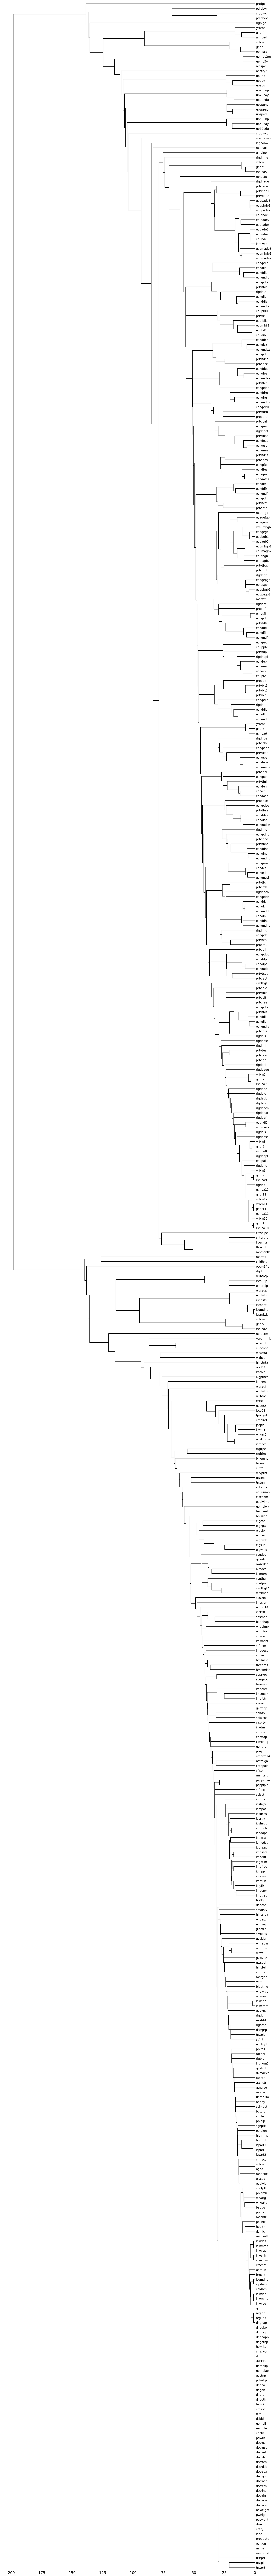

In [10]:
# missingness dendrogram
missing_dendro = msno.dendrogram(data_nan)
save_fig = missing_dendro.get_figure()
save_fig.savefig('figures/missing_dendrogram.png', bbox_inches='tight', dpi=150)

In [13]:
# store data as csv
data_nan.to_csv('ESS8 data/ESS8_cleaned_wmissingvals.csv', index=False)

In [14]:
missing_cols = data_nan.columns[data_nan.isnull().any()].to_list()
percent_missing = data_nan[missing_cols].isnull().sum() * 100 / len(data_nan)
missing_info = pd.DataFrame({'column name':missing_cols,
                             'percentage missing':percent_missing})

# show top 10 missing values
missing_info_sorted = missing_info.sort_values('percentage missing', inplace=False, ascending=False)
missing_info_sorted[0:10]

,column name,percentage missing
gndr12,gndr12,99.988735
rshipa12,rshipa12,99.988735
yrbrn12,yrbrn12,99.988735
yrbrn11,yrbrn11,99.979724
rshipa11,rshipa11,99.977471
gndr11,gndr11,99.977471
rlgdelt,rlgdelt,99.941424
yrbrn10,yrbrn10,99.936918
gndr10,gndr10,99.925654
rshipa10,rshipa10,99.923401


In [15]:
# store info columns with missing data
text_file = open("missing_data_info/missing_data_info.txt", "w")
text_file.write(missing_info.to_string())

19925

In [16]:
# store info columns with missing data, sorted version
text_file = open("missing_data_info/missing_data_info_sorted.txt", "w")
text_file.write(missing_info_sorted.to_string())

19925

### Add the below to thesis images notebook later (for completeness)

In [17]:
# extract the mean percentage of missing values
missing_info.mean()


/var/folders/hz/w8lmx83s7ks9bykdf41f9n_r0000gn/T/ipykernel_69586/403655463.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  missing_info.mean()


percentage missing    53.54144
dtype: float64

In [18]:
# visualize missingness in the data
missing_info_sorted[:-10]


,column name,percentage missing
gndr12,gndr12,99.988735
rshipa12,rshipa12,99.988735
yrbrn12,yrbrn12,99.988735
yrbrn11,yrbrn11,99.979724
rshipa11,rshipa11,99.977471
...,...,...
inwsmm,inwsmm,0.076599
inwdds,inwdds,0.051817
inwyys,inwyys,0.049564
inwmms,inwmms,0.049564


In [28]:
# extract columns that have no missingness at all (from the original data with all features)
data_nan = data_nan[data_nan.columns[~data_nan.isnull().any()]]
non_missing_cols = data_nan.columns.tolist()
non_missing_cols

['name',
 'essround',
 'edition',
 'proddate',
 'idno',
 'cntry',
 'dweight',
 'pspwght',
 'pweight',
 'anweight',
 'dscrrce',
 'dscrntn',
 'dscrrlg',
 'dscrlng',
 'dscretn',
 'dscrage',
 'dscrgnd',
 'dscrsex',
 'dscrdsb',
 'dscroth',
 'dscrdk',
 'dscrref',
 'dscrnap',
 'dscrna',
 'pdwrk',
 'edctn',
 'uempla',
 'uempli',
 'dsbld',
 'rtrd',
 'cmsrv',
 'hswrk',
 'dngoth',
 'dngref',
 'dngdk',
 'dngna',
 'pdwrkp',
 'edctnp',
 'uemplap',
 'uemplip',
 'dsbldp',
 'rtrdp',
 'cmsrvp',
 'hswrkp',
 'dngothp',
 'dngnapp',
 'dngrefp',
 'dngdkp',
 'dngnap',
 'regunit']

In [29]:
# extract the number of complete features
len(non_missing_cols)


50

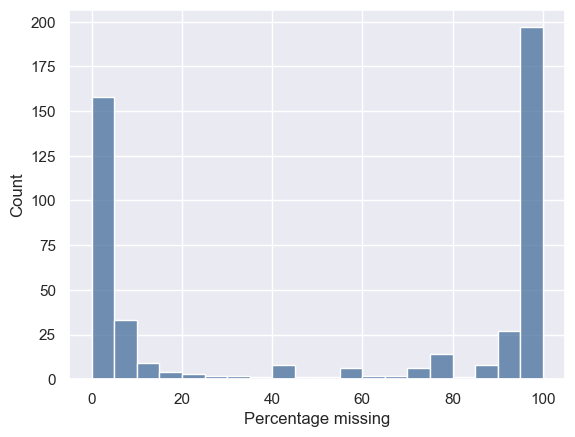

In [52]:
# plot the percentage of missing values against the frequency of that percentage occurring in the data

missing_info_asc = missing_info.sort_values('percentage missing', ascending=True)
ax = sns.histplot(data=missing_info_asc, x='percentage missing',
             stat='count', bins=20,
             color='#446e9b')
ax.set(xlabel='Percentage missing')

fig = ax.get_figure()
fig.savefig('figures/countplot_missingness.png', dpi=300, bbox_inches='tight')

### Post-cleaning EDA

Below, some basic EDA is conducted on the cleaned data.

In [ ]:
data = pd.read_csv('ESS8 data/ESS8_subset_cleaned_timeadj_wmissingvals.csv', low_memory=False)

# make df with missingness percentage of features with missingness
missing_cols = data.columns[data.isnull().any()].to_list()
percent_missing = data[missing_cols].isnull().sum() * 100 / len(data)
missing_info = pd.DataFrame({'column name':missing_cols,
                             'percentage missing':percent_missing})

In [ ]:
# histograms of all features in cleaned data
data.hist(figsize=(256,320), bins=50, xlabelsize=12, ylabelsize=12)
plt.savefig('figures/clean_data_hist', dpi=200, bbox_inches='tight')